# COVID-19 Vaccination Statistics in England

I-Hsuan Lin

University of Manchester

February 20, 2022

## 1. Introduction

This notebook shows how to use `readxl` package to retreive the *Monthly COVID-19 Vaccinations* Dataset from
[NHS England](https://www.england.nhs.uk/statistics/statistical-work-areas/covid-19-vaccinations/) and create various plots to show key statistics with `ggplot2`.

### About this dataset

The majority of the figures in this publication provide information on individuals who are eligible for vaccination (those who have an NHS number and are currently alive) who have been vaccinated for COVID-19 in England or who live in England but have been vaccinated for COVID-19 outside of England.

The publication also includes figures based on all vaccinations administered in England, even if individuals vaccinated are resident outside of England, do not have an NHS number or are no longer alive.

All data in the monthly publication covers vaccinations administered up to midnight of the last day of the previous month.

- **Period**: 8th December 2020 to 31st January 2022
- **Source**: National Immunisation Management System (NIMS)
- **Basis**: England
- **Published**: 10th February 2022

## 2. Loading required libraries

In [1]:
library(readxl)
library(ggplot2)
library(scales)
library(tidyverse)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ purrr::discard()    masks scales::discard()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()



## 3. Set output parameters

In [2]:
# Set width
options(width = 110)

# Set output image size
options(repr.plot.width = 12, repr.plot.height = 10, repr.plot.res = 150)

## 4. Retrieve datasets

- `n1` - ONS Population Estimates - Mid-year 2020
- `n2` - COVID-19 Vaccinations By NHS Region of Residence and Age Group
   - `n2a` - 1st dose
   - `n2b` - 2nd dose
   - `n2c` - Booster or 3rd dose
- `n3` - COVID-19 Cumulative Vaccinations by Date of Vaccination and NHS Region of Residence
- `n4` - NIMS Population Estimates by Ethnicity
- `n5` - COVID-19 Vaccinations By Ethnicity and Age Group

In [3]:
domain <- "https://www.england.nhs.uk"
path <- "statistics/wp-content/uploads/sites/2/2022/02"
filename <- "COVID-19-monthly-announced-vaccinations-10-February-2022.xlsx"

# Download file
download.file(url = paste0(domain, "/", path, "/", filename), destfile = filename, method = "curl")

In [4]:
# Use read_excel to import from Excel file
n1 <- read_excel(filename, sheet = "11. Pop estimates (ONS 2020)", range = cell_rows(c(12:22)), 
                 .name_repair =  ~ make.names(.x, unique = TRUE)) %>% filter_all(any_vars(!is.na(.)))

n2a <- read_excel(filename, sheet = "1. Region & Age", range = cell_rows(c(23:33)), 
                  .name_repair =  ~ make.names(.x, unique = TRUE)) %>% filter_all(any_vars(!is.na(.)))
n2b <- read_excel(filename, sheet = "1. Region & Age", range = cell_rows(c(35:45)), 
                  .name_repair =  ~ make.names(.x, unique = TRUE)) %>% filter_all(any_vars(!is.na(.)))
n2c <- read_excel(filename, sheet = "1. Region & Age", range = cell_rows(c(47:57)), 
                  .name_repair =  ~ make.names(.x, unique = TRUE)) %>% filter_all(any_vars(!is.na(.)))

n3 <- read_excel(filename, sheet = "9. Vaccination Date", range = cell_rows(c(12:1000)), 
                 .name_repair =  ~ make.names(.x, unique = TRUE)) %>% filter_all(any_vars(!is.na(.)))

n4 <- read_excel(filename, sheet = "12. Pop estimates (NIMS)", range = cell_rows(c(11:31)), 
                 .name_repair =  ~ make.names(.x, unique = TRUE)) %>% filter_all(any_vars(!is.na(.)))

n5 <- read_excel(filename, sheet = "4. Ethnicity, Region & Age", range = cell_rows(c(11:32)), 
                 .name_repair =  ~ make.names(.x, unique = TRUE)) %>% filter_all(any_vars(!is.na(.)))

### ONS Population Estimates - Mid-year 2020

In [5]:
n1

NHS.Region.code,NHS.Region.name,Population.estimates,X,X.1,X.2,X.3,X.4,X.5,X.6,⋯,X.8,X.9,X.10,X.11,X.12,X.13,X.14,X.15,X.16,X.17
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NA,NA,12-15,16-17,18-24,25-29,30-34,35-39,40-44,45-49,⋯,55-59,60-64,65-69,70-74,75-79,80+,50+,18+,16+,12+
Total,NA,2677375,1241048,4709589,3771493,3824652,3738209,3476303,3638639,⋯,3761782,3196813,2784300,2814128,2009992,2855599,21297965,44456850,45697898,48375273
E40000007,East of England,315856,145782,479752,384581,416699,426645,412105,433086,⋯,444975,378161,335555,351218,248720,360486,2579256,5132124,5277906,5593762
E40000003,London,425353,194388,736340,757848,822084,779934,677463,598535,⋯,508722,405576,318142,280432,196419,303460,2582689,6954893,7149281,7574634
E40000008,Midlands,509982,237344,947215,713304,688378,660316,615515,673679,⋯,712712,603851,540497,544799,401607,543471,4080250,8378657,8616001,9125983
E40000009,North East and Yorkshire,401712,187774,765645,579443,553856,529824,485807,535766,⋯,596153,526252,458083,458577,317900,446586,3397769,6848110,7035884,7437596
E40000010,North West,337753,155579,609540,481696,475288,452349,409264,444047,⋯,481787,410948,355984,359969,253220,347074,2696053,5568237,5723816,6061569
E40000005,South East,433440,201388,711490,523246,532050,558420,560014,599522,⋯,616756,517599,449454,474941,342550,503477,3538833,7023575,7224963,7658403
E40000006,South West,253279,118793,459607,331375,336297,330721,316135,354004,⋯,400677,354426,326585,344192,249576,351045,2423115,4551254,4670047,4923326


### COVID-19 Vaccinations By NHS Region of Residence and Age Group

In [6]:
n2a
n2b
n2c

NHS.Region.code,NHS.Region.of.residence.name,X1st.dose9.10.11,X,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,X.10,X.11,X.12,X.13
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NA,NA,12-15,16-17,18-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80+
Total4,NA,1561190,916873,3831919,3093846,3380286,3360830,3280975,3311421,3700352,3683026,3192266,2703419,2702765,2052902,2643512
E40000007,East of England,197568,113922,406822,330971,373258,384560,390428,397718,439813,437417,378139,324429,336106,259286,334004
E40000003,London,194398,116417,601035,649773,680587,634890,593645,538903,522245,480003,384796,294917,255028,185764,253706
E40000008,Midlands,296558,174284,713618,525313,584236,588262,578728,604112,702308,693988,605265,523074,526425,408889,510473
E40000009,North East and Yorkshire,232682,137797,591275,441919,477144,477735,459327,478173,567108,580822,522338,447787,445521,323296,414567
E40000010,North West,183272,111210,468703,364543,402743,406627,388325,399434,463960,470922,412542,348020,347711,255936,322444
E40000005,South East,289432,162411,589706,449726,508843,526761,539719,550957,605999,605595,518907,439168,452994,355274,468512
E40000006,South West,163100,97522,397910,290949,318262,314002,308845,324302,380186,397344,356351,316606,332039,259932,334131


NHS.Region.code,NHS.Region.of.residence.name,X2nd.dose9.10.12,X,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,X.10,X.11,X.12,X.13
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NA,NA,12-15,16-17,18-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80+
Total4,NA,484405,650509,3388114,2814885,3131912,3172969,3142609,3207942,3615287,3615256,3143994,2670960,2679063,2037553,2624589
E40000007,East of England,72071,82736,368395,304285,349114,366033,376601,387595,431705,431155,373659,321334,333821,257785,332149
E40000003,London,58120,77717,507128,589047,627886,594122,562366,515084,502267,463559,373092,286975,249495,182117,249386
E40000008,Midlands,88010,122687,635373,477195,540785,555753,554826,586383,687877,683044,597454,517812,522725,406506,507356
E40000009,North East and Yorkshire,64042,96662,523822,400318,440551,450723,439905,464347,556163,572713,516813,444256,442916,321741,412512
E40000010,North West,54242,76296,410525,327716,368405,380164,369131,384857,452200,461616,406356,344148,344910,254144,320168
E40000005,South East,102309,120464,534982,415471,477727,503386,522755,538179,595680,597093,512612,434814,449534,353009,465719
E40000006,South West,44636,72344,363137,269967,299826,300548,299265,317011,374061,392199,352631,313951,329967,258536,332532


NHS.Region.code,NHS.Region.of.residence.name,Booster.or.3rd.dose9.10.13.14,X,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,X.10,X.11,X.12
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NA,NA,Under 18,18-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80+
Total4,NA,83029,1747369,1579321,1930689,2146730,2330557,2557267,3087670,3198912,2871293,2520374,2576972,1970152,2508596
E40000007,East of England,10249,200718,177475,222245,256373,288163,318074,377879,389481,346147,306633,323594,250957,320917
E40000003,London,9921,229953,327307,376990,375250,381938,370249,389241,375806,317776,255881,230299,169417,229545
E40000008,Midlands,14444,325366,259011,326004,371330,409433,468459,589333,605880,547886,490105,503542,393518,485731
E40000009,North East and Yorkshire,13145,266043,216149,263603,301398,325083,371226,478089,512565,476537,422380,428335,312433,395168
E40000010,North West,10759,188434,164764,206435,239534,259368,294710,377084,402150,367630,323071,330369,244720,303988
E40000005,South East,15231,306366,254728,319763,368903,416602,456285,532230,546054,479548,416455,436455,344129,448584
E40000006,South West,9131,212170,167805,204004,223952,241292,270820,335564,359443,329685,301579,320975,252669,321905


### COVID-19 Cumulative Vaccinations by Date of Vaccination and NHS Region of Residence

In [7]:
head(n3)

Date.of.Vaccination4,X,X1st.dose6,X.1,X.2,X.3,X.4,X.5,X.6,X.7,⋯,Booster.or.3rd.dose8.9,X.17,X.18,X.19,X.20,X.21,X.22,X.23,X.24,Cumulative.total.doses.to.date10
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>
NA,NA,East of England,London,Midlands,North East and Yorkshire,North West,South East,South West,England5,⋯,East of England,London,Midlands,North East and Yorkshire,North West,South East,South West,England5,NA,NA
44197,Friday,114680,128586,207691,202626,151359,196665,137528,1144430,⋯,0,0,0,0,0,0,0,0,NA,1157066
44198,Saturday,116610,131688,215774,206181,155282,200935,143186,1175121,⋯,0,0,0,0,0,0,0,0,NA,1192552
44199,Sunday,118150,132535,220467,207534,157275,203886,146375,1191830,⋯,0,0,0,0,0,0,0,0,NA,1213144
44200,Monday,121756,137096,224858,211816,160328,209413,148881,1220030,⋯,0,0,0,0,0,0,0,0,NA,1251008
44201,Tuesday,128732,147270,234264,220953,168050,219200,154663,1279512,⋯,0,0,0,0,0,0,0,0,NA,1358955


### NIMS Population Estimates by Ethnicity

In [8]:
n4

Ethnicity2,X,Population.estimates,X.1,X.2,X.3,X.4,X.5,X.6,X.7,⋯,X.9,X.10,X.11,X.12,X.13,X.14,X.15,X.16,X.17,X.18
<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NA,NA,12-15,16-17,18-24,25-29,30-34,35-39,40-44,45-49,⋯,55-59,60-64,65-69,70-74,75-79,80+,50+,18+,16+,12+
Total,NA,2886908,1375297,5402719,4550951,4849012,4598423,4217136,3999646,⋯,4121585,3507189,2916276,2852363,2142152,2763730,22552935,50170822,51546119,54433027
A: White - British,NA,1660208,780251,2804520,2283752,2432774,2262875,2148520,2289162,⋯,2864918,2516648,2170615,2245127,1718693,2237367,16492080,30713683,31493934,33154142
B: White - Irish,NA,6588,3275,19710,23435,28242,27133,24026,22403,⋯,25531,22019,21521,23063,20812,28753,166378,311327,314602,321190
C: White - Any other White background,NA,190190,82120,403447,493503,634142,634365,539168,408128,⋯,265477,210815,157477,134050,94043,120534,1310815,4423568,4505688,4695878
D: Mixed - White and Black Caribbean,NA,22860,9990,32360,23631,23163,17636,12584,10446,⋯,11214,7201,3724,2270,1985,3585,41060,160880,170870,193730
E: Mixed - White and Black African,NA,15415,6544,20433,14480,14640,15238,14475,13048,⋯,8192,5469,3157,1915,1160,1201,31629,123943,130487,145902
F: Mixed - White and Asian,NA,22448,9220,29722,19355,18385,16564,13745,11529,⋯,7379,4950,3460,2483,1620,1807,31103,140403,149623,172071
G: Mixed - Any other Mixed background,NA,36120,15328,50793,39436,41684,37647,31564,25421,⋯,16878,12214,8463,6525,4508,6390,75839,302384,317712,353832


### COVID-19 Vaccinations By Ethnicity and Age Group

In [9]:
n5

Ethnicity4,X,X1st.dose5.6.7.8,X.1,X.2,X.3,X.4,X.5,X.6,X.7,⋯,X.34,X.35,X.36,X.37,X.38,X.39,X.40,X.41,X.42,X.43
<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NA,NA,England,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,12-15,16-17,18-24,25-29,30-34,35-39,40-44,45-49,⋯,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80+
Total,NA,1561190,916873,3831919,3093846,3380286,3360830,3280975,3311421,⋯,2146730,2330557,2557267,3087670,3198912,2871293,2520374,2576972,1970152,2508596
A: White - British,NA,1040366,595627,2308238,1829647,1978400,1920389,1897086,2082500,⋯,1354360,1472104,1722553,2234276,2433747,2224078,1992594,2109010,1631551,2102759
B: White - Irish,NA,3234,2026,12536,15403,18183,18164,17749,18134,⋯,12908,13598,14613,17866,19505,17669,18168,20141,18551,25752
C: White - Any other White background,NA,75234,43114,215441,250037,331449,359461,340464,283880,⋯,198340,212534,197294,187147,167256,139913,114106,108456,80317,104260
D: Mixed - White and Black Caribbean,NA,7089,4263,17699,12098,11862,9651,7768,7181,⋯,4781,4502,4559,5650,6171,4234,2286,1513,1397,2389
E: Mixed - White and Black African,NA,6114,3389,12570,8613,9171,10364,10456,10042,⋯,4981,5723,6230,5638,4580,3278,1985,1160,746,727
F: Mixed - White and Asian,NA,12699,6238,21932,13205,12753,11904,10647,9464,⋯,7785,7525,7232,6559,5442,3763,2736,2008,1337,1418


## 5. Set descriptions

In [10]:
# '12-15','16-17','18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69',
# '70-74','75-79','80+'
ageGroup1 <- n1[1, 3:17] %>% as.character()
names(ageGroup1) <- paste0("G", 1:length(ageGroup1))
ageGroup1 <- factor(ageGroup1, levels = ageGroup1)
ageGroup1

# '18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80+'
ageGroup2 <- ageGroup1[!ageGroup1 %in% c("12-15","16-17")]
ageGroup2 <- droplevels(ageGroup2)
ageGroup2

regionName <- n1$NHS.Region.name[3:9]
regionCode <- n1$NHS.Region.code[3:9]
names(regionName) <- regionCode
regionName <- as.factor(regionName)
regionName

ethnicity <- n4[3:nrow(n4), 1] %>% pull()
names(ethnicity) <- paste0("E", seq_along(ethnicity))
ethnicity <- factor(ethnicity, levels = ethnicity)
ethnicity

G1    G2    G3    G4    G5    G6    G7    G8    G9   G10   G11   G12   G13   G14   G15 
12-15 16-17 18-24 25-29 30-34 35-39 40-44 45-49 50-54 55-59 60-64 65-69 70-74 75-79   80+ 
Levels: 12-15 16-17 18-24 25-29 30-34 35-39 40-44 45-49 50-54 55-59 60-64 65-69 70-74 75-79 80+

G3    G4    G5    G6    G7    G8    G9   G10   G11   G12   G13   G14   G15 
18-24 25-29 30-34 35-39 40-44 45-49 50-54 55-59 60-64 65-69 70-74 75-79   80+ 
Levels: 18-24 25-29 30-34 35-39 40-44 45-49 50-54 55-59 60-64 65-69 70-74 75-79 80+

E40000007                E40000003                E40000008                E40000009 
         East of England                   London                 Midlands North East and Yorkshire 
               E40000010                E40000005                E40000006 
              North West               South East               South West 
Levels: East of England London Midlands North East and Yorkshire North West South East South West

E1                                                     E2 
                                    A: White - British                                       B: White - Irish 
                                                    E3                                                     E4 
                 C: White - Any other White background                   D: Mixed - White and Black Caribbean 
                                                    E5                                                     E6 
                    E: Mixed - White and Black African                             F: Mixed - White and Asian 
                                                    E7                                                     E8 
                 G: Mixed - Any other Mixed background                     H: Asian or Asian British - Indian 
                                                    E9                                                    E10 
                 J: Asian or Asian British - Pakistani                K: Asian or Asian British - Bangladeshi 
                                                   E11                                                    E12 
L: Asian or Asian British - Any other Asian background                  M: Black or Black British - Caribbean 
                                                   E13                                                    E14 
                   N: Black or Black British - African P: Black or Black British - Any other Black background 
                                                   E15                                                    E16 
                      R: Other ethnic groups - Chinese        S: Other ethnic groups - Any other ethnic group 
                                                   E17 
                                    Not stated/Unknown 
17 Levels: A: White - British B: White - Irish ... Not stated/Unknown

## 6. Manipulate `data.frame`

### ONS Population Estimates - Mid-year 2020 (tibble `n1`)

In [11]:
# Wide format
population <- as.data.frame(n1[n1$NHS.Region.code %in% regionCode,]) %>% select(-NHS.Region.code) # drop 1st column
# Drop last 4 columns: 50+, 18+, 16+, 12+
population <- population[,1:(length(ageGroup1)+1)]
colnames(population) <- c("Region", names(ageGroup1))
population$Region <- factor(population$Region, levels = levels(regionName))
population <- mutate_at(population, vars(-Region), "as.integer")
population

# Convert to long format
population <- pivot_longer(population, !Region, names_to = "AgeGroup", values_to = "Total")
population$AgeGroup <- as.factor(population$AgeGroup)
population$AgeGroup <- factor(population$AgeGroup, levels = gtools::mixedsort(levels(population$AgeGroup)))
levels(population$AgeGroup) <- ageGroup1
head(population)

Region,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,G13,G14,G15
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
East of England,315856,145782,479752,384581,416699,426645,412105,433086,460141,444975,378161,335555,351218,248720,360486
London,425353,194388,736340,757848,822084,779934,677463,598535,569938,508722,405576,318142,280432,196419,303460
Midlands,509982,237344,947215,713304,688378,660316,615515,673679,733313,712712,603851,540497,544799,401607,543471
North East and Yorkshire,401712,187774,765645,579443,553856,529824,485807,535766,594218,596153,526252,458083,458577,317900,446586
North West,337753,155579,609540,481696,475288,452349,409264,444047,487071,481787,410948,355984,359969,253220,347074
South East,433440,201388,711490,523246,532050,558420,560014,599522,634056,616756,517599,449454,474941,342550,503477
South West,253279,118793,459607,331375,336297,330721,316135,354004,396614,400677,354426,326585,344192,249576,351045


Region,AgeGroup,Total
<fct>,<fct>,<int>
East of England,12-15,315856
East of England,16-17,145782
East of England,18-24,479752
East of England,25-29,384581
East of England,30-34,416699
East of England,35-39,426645


### COVID-19 Vaccinations By NHS Region of Residence and Age Group (tibble `n2a`, `n2b`, `n2c`)

#### First dose (region & age group)

In [12]:
# Wide format
ra1 <- as.data.frame(n2a[n2a$NHS.Region.code %in% regionCode,]) %>% select(-NHS.Region.code) # drop 1st column
colnames(ra1) <- c("Region", names(ageGroup1))
ra1$Region <- factor(ra1$Region, levels = levels(regionName))
ra1 <- mutate_at(ra1, vars(-Region), "as.integer")
ra1

# Convert to long format
ra1 <- pivot_longer(ra1, !Region, names_to = "AgeGroup", values_to = "Count")
ra1$AgeGroup <- as.factor(ra1$AgeGroup)
ra1$AgeGroup <- factor(ra1$AgeGroup, levels = gtools::mixedsort(levels(ra1$AgeGroup)))
levels(ra1$AgeGroup) <- ageGroup1
ra1$Dose <- "First Dose"
head(ra1)

Region,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,G13,G14,G15
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
East of England,197568,113922,406822,330971,373258,384560,390428,397718,439813,437417,378139,324429,336106,259286,334004
London,194398,116417,601035,649773,680587,634890,593645,538903,522245,480003,384796,294917,255028,185764,253706
Midlands,296558,174284,713618,525313,584236,588262,578728,604112,702308,693988,605265,523074,526425,408889,510473
North East and Yorkshire,232682,137797,591275,441919,477144,477735,459327,478173,567108,580822,522338,447787,445521,323296,414567
North West,183272,111210,468703,364543,402743,406627,388325,399434,463960,470922,412542,348020,347711,255936,322444
South East,289432,162411,589706,449726,508843,526761,539719,550957,605999,605595,518907,439168,452994,355274,468512
South West,163100,97522,397910,290949,318262,314002,308845,324302,380186,397344,356351,316606,332039,259932,334131


Region,AgeGroup,Count,Dose
<fct>,<fct>,<int>,<chr>
East of England,12-15,197568,First Dose
East of England,16-17,113922,First Dose
East of England,18-24,406822,First Dose
East of England,25-29,330971,First Dose
East of England,30-34,373258,First Dose
East of England,35-39,384560,First Dose


#### Second dose (region & age group)

In [13]:
# Wide format
ra2 <- as.data.frame(n2b[n2b$NHS.Region.code %in% regionCode,]) %>% select(-NHS.Region.code) # drop 1st column
colnames(ra2) <- c("Region", names(ageGroup1))
ra2$Region <- factor(ra2$Region, levels = levels(regionName))
ra2 <- mutate_at(ra2, vars(-Region), "as.integer")
ra2

# Convert to long format
ra2 <- pivot_longer(ra2, !Region, names_to = "AgeGroup", values_to = "Count")
ra2$AgeGroup <- as.factor(ra2$AgeGroup)
ra2$AgeGroup <- factor(ra2$AgeGroup, levels = gtools::mixedsort(levels(ra2$AgeGroup)))
levels(ra2$AgeGroup) <- ageGroup1
ra2$Dose <- "Second Dose"
head(ra2)

Region,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,G13,G14,G15
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
East of England,72071,82736,368395,304285,349114,366033,376601,387595,431705,431155,373659,321334,333821,257785,332149
London,58120,77717,507128,589047,627886,594122,562366,515084,502267,463559,373092,286975,249495,182117,249386
Midlands,88010,122687,635373,477195,540785,555753,554826,586383,687877,683044,597454,517812,522725,406506,507356
North East and Yorkshire,64042,96662,523822,400318,440551,450723,439905,464347,556163,572713,516813,444256,442916,321741,412512
North West,54242,76296,410525,327716,368405,380164,369131,384857,452200,461616,406356,344148,344910,254144,320168
South East,102309,120464,534982,415471,477727,503386,522755,538179,595680,597093,512612,434814,449534,353009,465719
South West,44636,72344,363137,269967,299826,300548,299265,317011,374061,392199,352631,313951,329967,258536,332532


Region,AgeGroup,Count,Dose
<fct>,<fct>,<int>,<chr>
East of England,12-15,72071,Second Dose
East of England,16-17,82736,Second Dose
East of England,18-24,368395,Second Dose
East of England,25-29,304285,Second Dose
East of England,30-34,349114,Second Dose
East of England,35-39,366033,Second Dose


#### Booster or 3rd dose (region & age group)

In [14]:
# Wide format
ra3 <- as.data.frame(n2c[n2c$NHS.Region.code %in% regionCode,]) %>% select(-NHS.Region.code) # drop 1st column
ra3 <- ra3[,-2] # Drop "Under 18"
colnames(ra3) <- c("Region", names(ageGroup2))
ra3$Region <- factor(ra3$Region, levels = levels(regionName))
ra3 <- mutate_at(ra3, vars(-Region), "as.integer")
ra3

# Convert to long format
ra3 <- pivot_longer(ra3, !Region, names_to = "AgeGroup", values_to = "Count")
ra3$AgeGroup <- as.factor(ra3$AgeGroup)
ra3$AgeGroup <- factor(ra3$AgeGroup, levels = gtools::mixedsort(levels(ra3$AgeGroup)))
levels(ra3$AgeGroup) <- ageGroup2
ra3$Dose <- "Booster/Third Dose"
head(ra3)

Region,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,G13,G14,G15
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
East of England,200718,177475,222245,256373,288163,318074,377879,389481,346147,306633,323594,250957,320917
London,229953,327307,376990,375250,381938,370249,389241,375806,317776,255881,230299,169417,229545
Midlands,325366,259011,326004,371330,409433,468459,589333,605880,547886,490105,503542,393518,485731
North East and Yorkshire,266043,216149,263603,301398,325083,371226,478089,512565,476537,422380,428335,312433,395168
North West,188434,164764,206435,239534,259368,294710,377084,402150,367630,323071,330369,244720,303988
South East,306366,254728,319763,368903,416602,456285,532230,546054,479548,416455,436455,344129,448584
South West,212170,167805,204004,223952,241292,270820,335564,359443,329685,301579,320975,252669,321905


Region,AgeGroup,Count,Dose
<fct>,<fct>,<int>,<chr>
East of England,18-24,200718,Booster/Third Dose
East of England,25-29,177475,Booster/Third Dose
East of England,30-34,222245,Booster/Third Dose
East of England,35-39,256373,Booster/Third Dose
East of England,40-44,288163,Booster/Third Dose
East of England,45-49,318074,Booster/Third Dose


#### Combine 1st, 2nd, 3rd/booster doses (region & age group)

In [15]:
dat1 <- rbind(ra1, ra2, ra3)
dat1 <- merge(population, dat1) %>% arrange(Region, order(gtools::mixedorder(AgeGroup)))
dat1$Fraction <- dat1$Count / dat1$Total
dat1$Dose <- as.factor(dat1$Dose)
dat1$Dose <- factor(dat1$Dose, levels = c("First Dose","Second Dose","Booster/Third Dose"))
head(dat1)

,Region,AgeGroup,Total,Count,Dose,Fraction
,<fct>,<fct>,<int>,<int>,<fct>,<dbl>
1,East of England,12-15,315856,197568,First Dose,0.6255002
2,East of England,12-15,315856,72071,Second Dose,0.2281768
3,East of England,16-17,145782,113922,First Dose,0.7814545
4,East of England,16-17,145782,82736,Second Dose,0.5675323
5,East of England,18-24,479752,406822,First Dose,0.8479840
6,East of England,18-24,479752,200718,Booster/Third Dose,0.4183787


### COVID-19 Cumulative Vaccinations by Date of Vaccination and NHS Region of Residence (tibble `n3`)

In [16]:
dr <- as.data.frame(n3) %>% rename(Date = 1)
# Remove columns and rows with all NAs
dr <- dr[rowSums(is.na(dr)) != ncol(dr), colSums(is.na(dr)) != nrow(dr)]
dr <- dr[grep("^44", dr$Date, invert = FALSE), ]
head(dr)

,Date,X,X1st.dose6,X.1,X.2,X.3,X.4,X.5,X.6,X.7,⋯,X.15,Booster.or.3rd.dose8.9,X.17,X.18,X.19,X.20,X.21,X.22,X.23,Cumulative.total.doses.to.date10
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
2,44197,Friday,114680,128586,207691,202626,151359,196665,137528,1144430,⋯,12636,0,0,0,0,0,0,0,0,1157066
3,44198,Saturday,116610,131688,215774,206181,155282,200935,143186,1175121,⋯,17431,0,0,0,0,0,0,0,0,1192552
4,44199,Sunday,118150,132535,220467,207534,157275,203886,146375,1191830,⋯,21314,0,0,0,0,0,0,0,0,1213144
5,44200,Monday,121756,137096,224858,211816,160328,209413,148881,1220030,⋯,30978,0,0,0,0,0,0,0,0,1251008
6,44201,Tuesday,128732,147270,234264,220953,168050,219200,154663,1279512,⋯,79443,0,0,0,0,0,0,0,0,1358955
7,44202,Wednesday,138526,162290,248873,236523,180253,233511,163871,1370935,⋯,162650,0,0,0,0,0,0,0,0,1533585


#### First dose (date & region)

In [17]:
# Wide format
idx <- grep("1st.dose", colnames(dr)) # 1st.dose
dr1 <- dr[, c(1, idx:(length(regionName)+(idx-1)))]
colnames(dr1) <- c("Date", as.character(regionName))
dr1$Date <- as.Date(as.integer(dr1$Date), origin = "1899-12-30") # Change data format
dr1 <- mutate_at(dr1, vars(-Date), "as.integer")
head(dr1)

# Convert to long format
dr1 <- pivot_longer(dr1, !Date, names_to = "Region", values_to = "Count")
dr1$Region <- factor(dr1$Region, levels = levels(regionName))
dr1$Dose <- "First Dose"
head(dr1)

,Date,East of England,London,Midlands,North East and Yorkshire,North West,South East,South West
,<date>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2,2021-01-01,114680,128586,207691,202626,151359,196665,137528
3,2021-01-02,116610,131688,215774,206181,155282,200935,143186
4,2021-01-03,118150,132535,220467,207534,157275,203886,146375
5,2021-01-04,121756,137096,224858,211816,160328,209413,148881
6,2021-01-05,128732,147270,234264,220953,168050,219200,154663
7,2021-01-06,138526,162290,248873,236523,180253,233511,163871


Date,Region,Count,Dose
<date>,<fct>,<int>,<chr>
2021-01-01,East of England,114680,First Dose
2021-01-01,London,128586,First Dose
2021-01-01,Midlands,207691,First Dose
2021-01-01,North East and Yorkshire,202626,First Dose
2021-01-01,North West,151359,First Dose
2021-01-01,South East,196665,First Dose


#### Second dose (date & region)

In [18]:
# Wide format
idx <- grep("2nd.dose", colnames(dr)) # 2nd.dose
dr2 <- dr[, c(1, idx:(length(regionName)+(idx-1)))]
colnames(dr2) <- c("Date", as.character(regionName))
dr2$Date <- as.Date(as.integer(dr2$Date), origin = "1899-12-30") # Change data format
dr2 <- mutate_at(dr2, vars(-Date), "as.integer")
head(dr2)

# Convert to long format
dr2 <- pivot_longer(dr2, !Date, names_to = "Region", values_to = "Count")
dr2$Region <- factor(dr2$Region, levels = levels(regionName))
dr2$Dose <- "Second Dose"
head(dr2)

,Date,East of England,London,Midlands,North East and Yorkshire,North West,South East,South West
,<date>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2,2021-01-01,2019,936,2518,1123,3580,1424,870
3,2021-01-02,2885,1071,3564,1594,4473,2091,1541
4,2021-01-03,3757,1164,4588,1977,4859,2583,2138
5,2021-01-04,4859,1900,7069,3216,6759,3778,3057
6,2021-01-05,13520,5812,13787,13677,12913,10458,8841
7,2021-01-06,25870,15108,26217,28628,23709,22697,19824


Date,Region,Count,Dose
<date>,<fct>,<int>,<chr>
2021-01-01,East of England,2019,Second Dose
2021-01-01,London,936,Second Dose
2021-01-01,Midlands,2518,Second Dose
2021-01-01,North East and Yorkshire,1123,Second Dose
2021-01-01,North West,3580,Second Dose
2021-01-01,South East,1424,Second Dose


#### Booster or 3rd dose (date & region)

In [19]:
# Wide format
idx <- grep("Booster.or.3rd.dose", colnames(dr)) # Booster.or.3rd.dose
dr3 <- dr[, c(1, idx:(length(regionName)+(idx-1)))]
colnames(dr3) <- c("Date", as.character(regionName))
dr3$Date <- as.Date(as.integer(dr3$Date), origin = "1899-12-30") # Change data format
dr3 <- mutate_at(dr3, vars(-Date), "as.integer")
head(dr3)

# Convert to long format
dr3 <- pivot_longer(dr3, !Date, names_to = "Region", values_to = "Count")
dr3$Region <- factor(dr3$Region, levels = levels(regionName))
dr3$Dose <- "Booster/Third Dose"
head(dr3)

,Date,East of England,London,Midlands,North East and Yorkshire,North West,South East,South West
,<date>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2,2021-01-01,0,0,0,0,0,0,0
3,2021-01-02,0,0,0,0,0,0,0
4,2021-01-03,0,0,0,0,0,0,0
5,2021-01-04,0,0,0,0,0,0,0
6,2021-01-05,0,0,0,0,0,0,0
7,2021-01-06,0,0,0,0,0,0,0


Date,Region,Count,Dose
<date>,<fct>,<int>,<chr>
2021-01-01,East of England,0,Booster/Third Dose
2021-01-01,London,0,Booster/Third Dose
2021-01-01,Midlands,0,Booster/Third Dose
2021-01-01,North East and Yorkshire,0,Booster/Third Dose
2021-01-01,North West,0,Booster/Third Dose
2021-01-01,South East,0,Booster/Third Dose


#### Combine 1st, 2nd, 3rd/booster doses (date & region)

In [20]:
dat2 <- rbind(dr1, dr2, dr3)
totalPop <- population %>% group_by(Region) %>% summarise(Total = sum(Total))
dat2 <- merge(totalPop, dat2) %>% arrange(Region, Date)
dat2$Fraction <- dat2$Count / dat2$Total
dat2$Dose <- factor(dat2$Dose, levels = c("First Dose","Second Dose","Booster/Third Dose"))
head(dat2)

,Region,Total,Date,Count,Dose,Fraction
,<fct>,<int>,<date>,<int>,<fct>,<dbl>
1,East of England,5593762,2021-01-01,114680,First Dose,0.0205014085
2,East of England,5593762,2021-01-01,0,Booster/Third Dose,0.0000000000
3,East of England,5593762,2021-01-01,2019,Second Dose,0.0003609378
4,East of England,5593762,2021-01-02,116610,First Dose,0.0208464357
5,East of England,5593762,2021-01-02,0,Booster/Third Dose,0.0000000000
6,East of England,5593762,2021-01-02,2885,Second Dose,0.0005157531


### NIMS Population Estimates by Ethnicity (tibble `n4`)

In [21]:
# Wide format
epop <- as.data.frame(n4) %>% rename("Ethnicity" = 1)
epop <- epop[epop$Ethnicity %in% ethnicity,]
# Remove columns and rows with all NAs
epop <- epop[rowSums(is.na(epop)) != ncol(epop), colSums(is.na(epop)) != nrow(epop)]
# Drop last 4 columns: 50+, 18+, 16+, 12+
epop <- epop[,1:(length(ageGroup1)+1)]
colnames(epop) <- c("Ethnicity", names(ageGroup1))
epop <- mutate_at(epop, vars(-Ethnicity), "as.integer")
head(epop)

# Convert to long format
epop <- pivot_longer(epop, !Ethnicity, names_to = "AgeGroup", values_to = "Total")
epop$AgeGroup <- as.factor(epop$AgeGroup)
epop$AgeGroup <- factor(epop$AgeGroup, levels = gtools::mixedsort(levels(epop$AgeGroup)))
levels(epop$AgeGroup) <- ageGroup1
head(epop)

,Ethnicity,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,G13,G14,G15
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
3,A: White - British,1660208,780251,2804520,2283752,2432774,2262875,2148520,2289162,2738712,2864918,2516648,2170615,2245127,1718693,2237367
4,B: White - Irish,6588,3275,19710,23435,28242,27133,24026,22403,24679,25531,22019,21521,23063,20812,28753
5,C: White - Any other White background,190190,82120,403447,493503,634142,634365,539168,408128,328419,265477,210815,157477,134050,94043,120534
6,D: Mixed - White and Black Caribbean,22860,9990,32360,23631,23163,17636,12584,10446,11081,11214,7201,3724,2270,1985,3585
7,E: Mixed - White and Black African,15415,6544,20433,14480,14640,15238,14475,13048,10535,8192,5469,3157,1915,1160,1201
8,F: Mixed - White and Asian,22448,9220,29722,19355,18385,16564,13745,11529,9404,7379,4950,3460,2483,1620,1807


Ethnicity,AgeGroup,Total
<chr>,<fct>,<int>
A: White - British,12-15,1660208
A: White - British,16-17,780251
A: White - British,18-24,2804520
A: White - British,25-29,2283752
A: White - British,30-34,2432774
A: White - British,35-39,2262875


### COVID-19 Vaccinations By Ethnicity and Age Group (tibble `n5`)

In [22]:
ea <- as.data.frame(n5) %>% rename(Ethnicity = 1)
ea <- ea[ea$Ethnicity %in% ethnicity,]
# Remove columns and rows with all NAs
ea <- ea[rowSums(is.na(ea)) != ncol(ea), colSums(is.na(ea)) != nrow(ea)]
head(ea)

,Ethnicity,X1st.dose5.6.7.8,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,⋯,X.34,X.35,X.36,X.37,X.38,X.39,X.40,X.41,X.42,X.43
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
4,A: White - British,1040366,595627,2308238,1829647,1978400,1920389,1897086,2082500,2554610,⋯,1354360,1472104,1722553,2234276,2433747,2224078,1992594,2109010,1631551,2102759
5,B: White - Irish,3234,2026,12536,15403,18183,18164,17749,18134,21111,⋯,12908,13598,14613,17866,19505,17669,18168,20141,18551,25752
6,C: White - Any other White background,75234,43114,215441,250037,331449,359461,340464,283880,244432,⋯,198340,212534,197294,187147,167256,139913,114106,108456,80317,104260
7,D: Mixed - White and Black Caribbean,7089,4263,17699,12098,11862,9651,7768,7181,8107,⋯,4781,4502,4559,5650,6171,4234,2286,1513,1397,2389
8,E: Mixed - White and Black African,6114,3389,12570,8613,9171,10364,10456,10042,8273,⋯,4981,5723,6230,5638,4580,3278,1985,1160,746,727
9,F: Mixed - White and Asian,12699,6238,21932,13205,12753,11904,10647,9464,8041,⋯,7785,7525,7232,6559,5442,3763,2736,2008,1337,1418


#### First dose (ethnicity & age group)

In [23]:
# Wide format
idx <- grep("1st.dose", colnames(ea)) # 1st.dose
ea1 <- ea[, c(1, idx:(length(ageGroup1)+(idx-1)))]
colnames(ea1) <- c("Ethnicity", names(ageGroup1))
ea1 <- mutate_at(ea1, vars(-Ethnicity), "as.integer")
head(ea1)

# Convert to long format
ea1 <- pivot_longer(ea1, !Ethnicity, names_to = "AgeGroup", values_to = "Count")
ea1$AgeGroup <- as.factor(ea1$AgeGroup)
ea1$AgeGroup <- factor(ea1$AgeGroup, levels = gtools::mixedsort(levels(ea1$AgeGroup)))
levels(ea1$AgeGroup) <- ageGroup1
ea1$Dose <- "First Dose"
head(ea1)

,Ethnicity,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,G13,G14,G15
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
4,A: White - British,1040366,595627,2308238,1829647,1978400,1920389,1897086,2082500,2554610,2706604,2403309,2090673,2182926,1682703,2193969
5,B: White - Irish,3234,2026,12536,15403,18183,18164,17749,18134,21111,22457,19732,19752,21459,19679,27485
6,C: White - Any other White background,75234,43114,215441,250037,331449,359461,340464,283880,244432,206902,165971,128161,116887,85365,111559
7,D: Mixed - White and Black Caribbean,7089,4263,17699,12098,11862,9651,7768,7181,8107,8445,5527,2870,1813,1612,2878
8,E: Mixed - White and Black African,6114,3389,12570,8613,9171,10364,10456,10042,8273,6451,4358,2494,1458,900,898
9,F: Mixed - White and Asian,12699,6238,21932,13205,12753,11904,10647,9464,8041,6411,4346,3064,2211,1444,1578


Ethnicity,AgeGroup,Count,Dose
<chr>,<fct>,<int>,<chr>
A: White - British,12-15,1040366,First Dose
A: White - British,16-17,595627,First Dose
A: White - British,18-24,2308238,First Dose
A: White - British,25-29,1829647,First Dose
A: White - British,30-34,1978400,First Dose
A: White - British,35-39,1920389,First Dose


#### Second dose (ethnicity & age group)

In [24]:
# Wide format
idx <- grep("2nd.dose", colnames(ea)) # 2nd.dose
ea2 <- ea[, c(1, idx:(length(ageGroup1)+(idx-1)))]
colnames(ea2) <- c("Ethnicity", names(ageGroup1))
ea2 <- mutate_at(ea2, vars(-Ethnicity), "as.integer")
head(ea2)

# Convert to long format
ea2 <- pivot_longer(ea2, !Ethnicity, names_to = "AgeGroup", values_to = "Count")
ea2$AgeGroup <- as.factor(ea2$AgeGroup)
ea2$AgeGroup <- factor(ea2$AgeGroup, levels = gtools::mixedsort(levels(ea2$AgeGroup)))
levels(ea2$AgeGroup) <- ageGroup1
ea2$Dose <- "Second Dose"
head(ea2)

,Ethnicity,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,G13,G14,G15
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
4,A: White - British,339538,439581,2125001,1703676,1864269,1839123,1838757,2037126,2515394,2674286,2381403,2076743,2171972,1675289,2183716
5,B: White - Irish,1154,1502,10995,14289,17139,17334,17115,17586,20606,21991,19388,19467,21214,19480,27241
6,C: White - Any other White background,23993,30015,188848,228273,307968,339531,326357,274312,237485,201780,162246,125782,115218,84348,110413
7,D: Mixed - White and Black Caribbean,1755,2620,14948,10556,10472,8662,7186,6721,7730,8088,5312,2785,1766,1582,2804
8,E: Mixed - White and Black African,1476,2038,10539,7490,8162,9497,9806,9574,7928,6197,4200,2409,1396,866,860
9,F: Mixed - White and Asian,4438,4546,19904,12204,11941,11303,10208,9186,7841,6263,4253,3012,2163,1422,1547


Ethnicity,AgeGroup,Count,Dose
<chr>,<fct>,<int>,<chr>
A: White - British,12-15,339538,Second Dose
A: White - British,16-17,439581,Second Dose
A: White - British,18-24,2125001,Second Dose
A: White - British,25-29,1703676,Second Dose
A: White - British,30-34,1864269,Second Dose
A: White - British,35-39,1839123,Second Dose


#### Booster or 3rd dose (ethnicity & age group)

In [25]:
# Wide format
idx <- grep("Booster.or.3rd.dose", colnames(ea)) # Booster.or.3rd.dose
ea3 <- ea[, c(1, idx:(length(ageGroup1)+(idx-2)))]
ea3 <- ea3[,-2] # Drop "Under 18"
colnames(ea3) <- c("Ethnicity", names(ageGroup2))
ea3 <- mutate_at(ea3, vars(-Ethnicity), "as.integer")
head(ea3)

# Convert to long format
ea3 <- pivot_longer(ea3, !Ethnicity, names_to = "AgeGroup", values_to = "Count")
ea3$AgeGroup <- as.factor(ea3$AgeGroup)
ea3$AgeGroup <- factor(ea3$AgeGroup, levels = gtools::mixedsort(levels(ea3$AgeGroup)))
levels(ea3$AgeGroup) <- ageGroup2
ea3$Dose <- "Booster/Third Dose"
head(ea3)

,Ethnicity,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,G13,G14,G15
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
4,A: White - British,1198247,1040620,1245082,1354360,1472104,1722553,2234276,2433747,2224078,1992594,2109010,1631551,2102759
5,B: White - Irish,5697,8828,11771,12908,13598,14613,17866,19505,17669,18168,20141,18551,25752
6,C: White - Any other White background,83905,112125,166151,198340,212534,197294,187147,167256,139913,114106,108456,80317,104260
7,D: Mixed - White and Black Caribbean,6034,4862,5224,4781,4502,4559,5650,6171,4234,2286,1513,1397,2389
8,E: Mixed - White and Black African,3809,2957,3744,4981,5723,6230,5638,4580,3278,1985,1160,746,727
9,F: Mixed - White and Asian,11169,7430,7731,7785,7525,7232,6559,5442,3763,2736,2008,1337,1418


Ethnicity,AgeGroup,Count,Dose
<chr>,<fct>,<int>,<chr>
A: White - British,18-24,1198247,Booster/Third Dose
A: White - British,25-29,1040620,Booster/Third Dose
A: White - British,30-34,1245082,Booster/Third Dose
A: White - British,35-39,1354360,Booster/Third Dose
A: White - British,40-44,1472104,Booster/Third Dose
A: White - British,45-49,1722553,Booster/Third Dose


#### Combine 1st, 2nd, 3rd/booster doses (ethnicity & age group)

In [26]:
head(epop)
head(ea1)
head(ea2)
head(ea3)

Ethnicity,AgeGroup,Total
<chr>,<fct>,<int>
A: White - British,12-15,1660208
A: White - British,16-17,780251
A: White - British,18-24,2804520
A: White - British,25-29,2283752
A: White - British,30-34,2432774
A: White - British,35-39,2262875


Ethnicity,AgeGroup,Count,Dose
<chr>,<fct>,<int>,<chr>
A: White - British,12-15,1040366,First Dose
A: White - British,16-17,595627,First Dose
A: White - British,18-24,2308238,First Dose
A: White - British,25-29,1829647,First Dose
A: White - British,30-34,1978400,First Dose
A: White - British,35-39,1920389,First Dose


Ethnicity,AgeGroup,Count,Dose
<chr>,<fct>,<int>,<chr>
A: White - British,12-15,339538,Second Dose
A: White - British,16-17,439581,Second Dose
A: White - British,18-24,2125001,Second Dose
A: White - British,25-29,1703676,Second Dose
A: White - British,30-34,1864269,Second Dose
A: White - British,35-39,1839123,Second Dose


Ethnicity,AgeGroup,Count,Dose
<chr>,<fct>,<int>,<chr>
A: White - British,18-24,1198247,Booster/Third Dose
A: White - British,25-29,1040620,Booster/Third Dose
A: White - British,30-34,1245082,Booster/Third Dose
A: White - British,35-39,1354360,Booster/Third Dose
A: White - British,40-44,1472104,Booster/Third Dose
A: White - British,45-49,1722553,Booster/Third Dose


In [27]:
dat3 <- rbind(ea1, ea2, ea3)
dat3 <- merge(epop, dat3) %>% arrange(Ethnicity, order(gtools::mixedorder(AgeGroup)))
dat3$Fraction <- dat3$Count / dat3$Total
dat3$AgeGroup <- as.factor(dat3$AgeGroup)
dat3$AgeGroup <- factor(dat3$AgeGroup, levels = gtools::mixedsort(levels(dat3$AgeGroup)))
levels(dat3$AgeGroup) <- ageGroup1
dat3$Dose <- as.factor(dat3$Dose)
dat3$Dose <- factor(dat3$Dose, levels = c("First Dose","Second Dose","Booster/Third Dose"))
head(dat3)

,Ethnicity,AgeGroup,Total,Count,Dose,Fraction
,<chr>,<fct>,<int>,<int>,<fct>,<dbl>
1,A: White - British,12-15,1660208,1040366,First Dose,0.6266480
2,A: White - British,12-15,1660208,339538,Second Dose,0.2045153
3,A: White - British,16-17,780251,439581,Second Dose,0.5633841
4,A: White - British,16-17,780251,595627,First Dose,0.7633787
5,A: White - British,18-24,2804520,2125001,Second Dose,0.7577058
6,A: White - British,18-24,2804520,2308238,First Dose,0.8230421


## 7. Create plots

### ONS population estimates in England

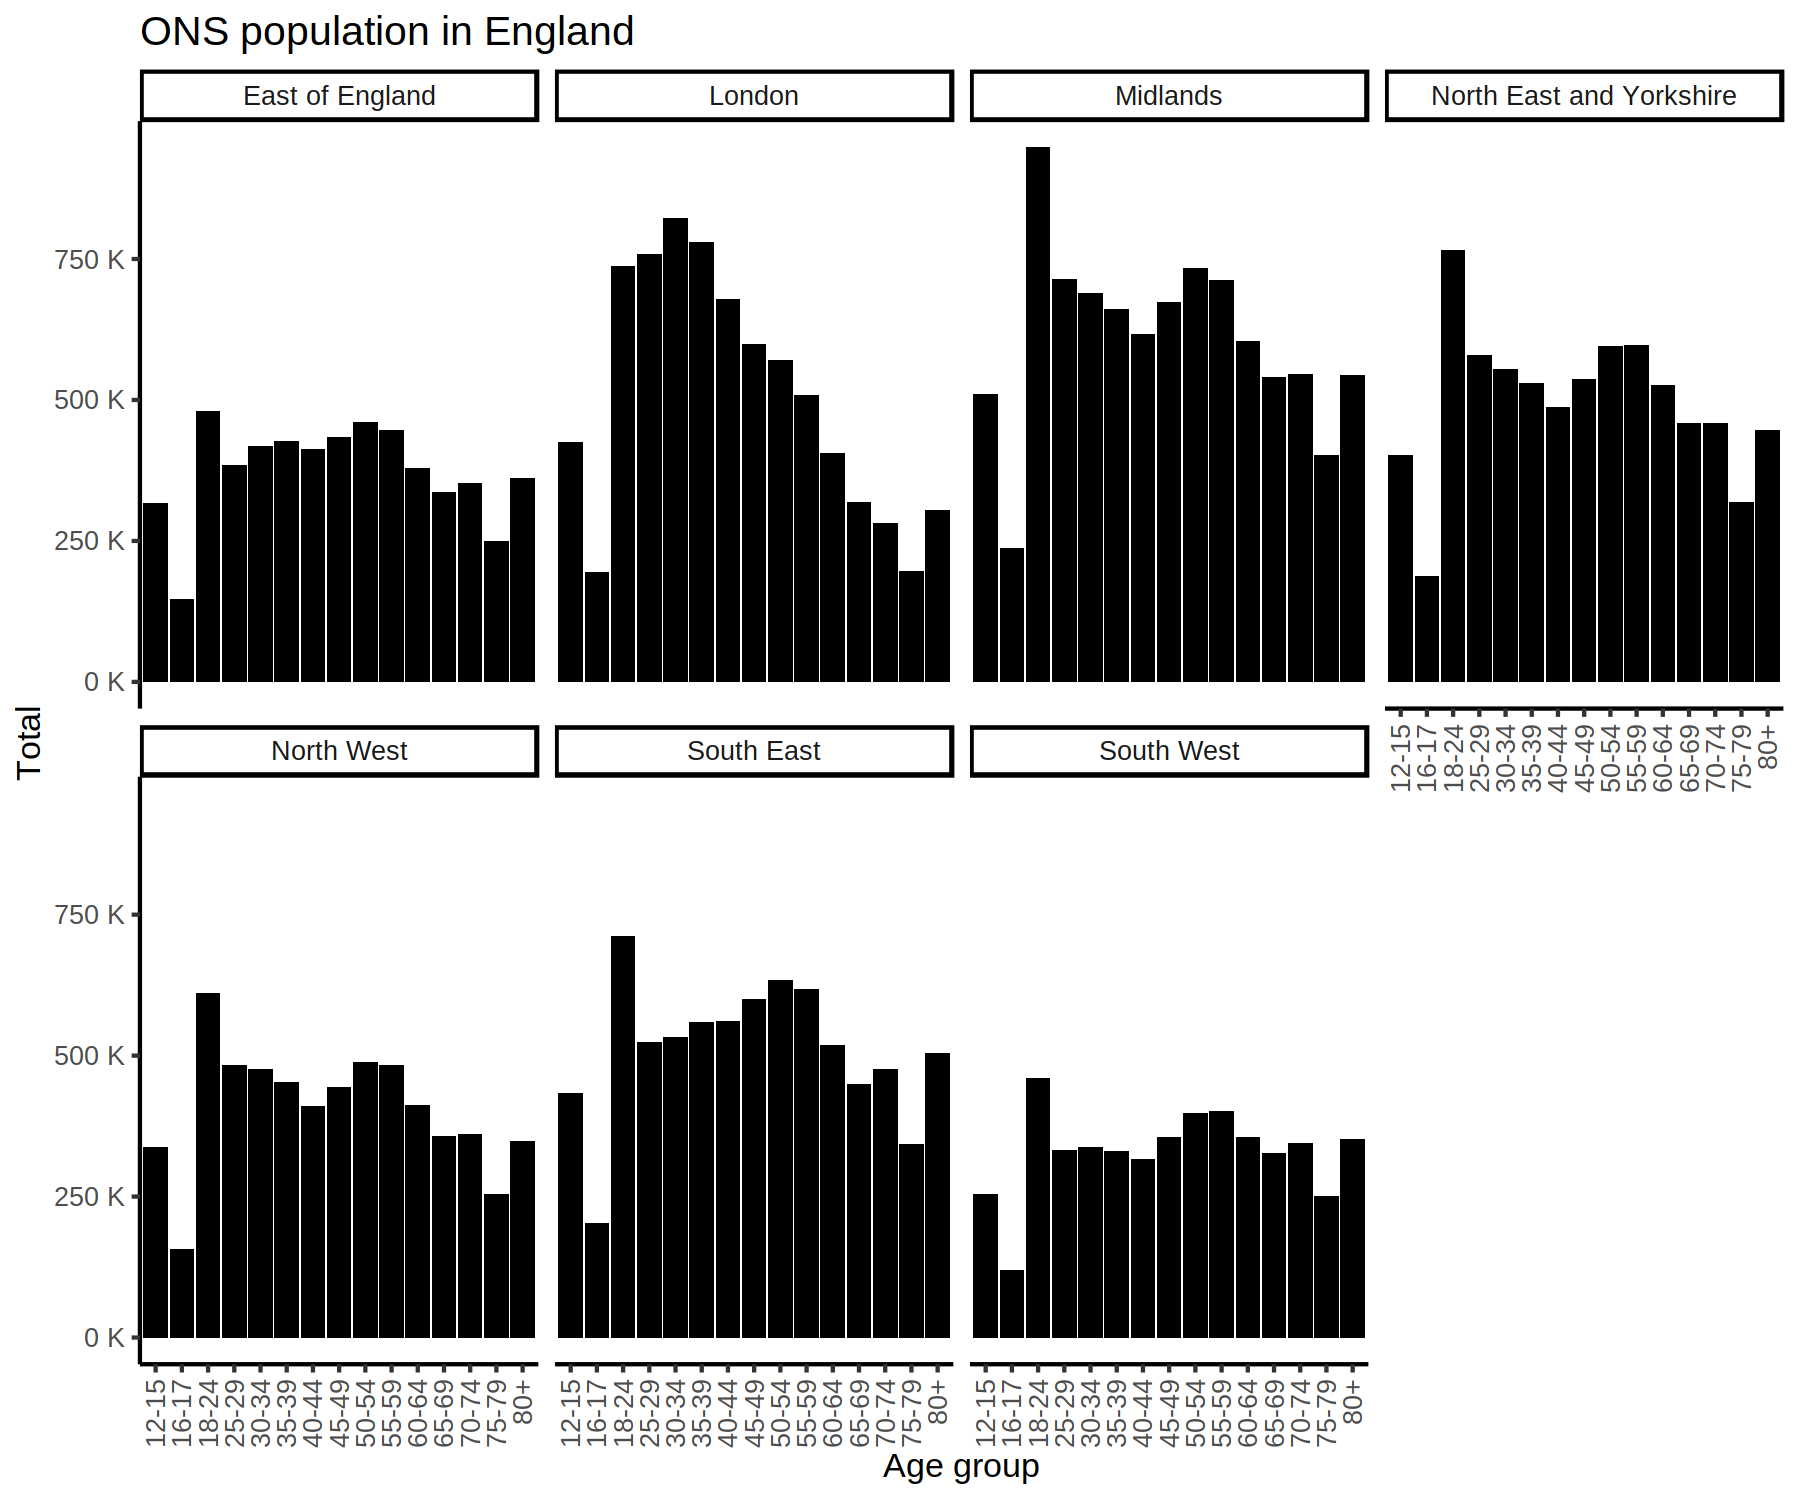

In [28]:
population %>% ggplot(aes(AgeGroup, Total)) + geom_col(fill = "black") + 
    facet_wrap(~ Region, ncol = 4) + theme_classic(base_size = 16) +
    scale_y_continuous(labels = unit_format(unit = "K", scale = 1e-3)) + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) +
    labs(title = "ONS population in England", x = "Age group")

### Cumulative COVID-19 doses by age group

`summarise()` has grouped output by 'AgeGroup'. You can override using the `.groups` argument.


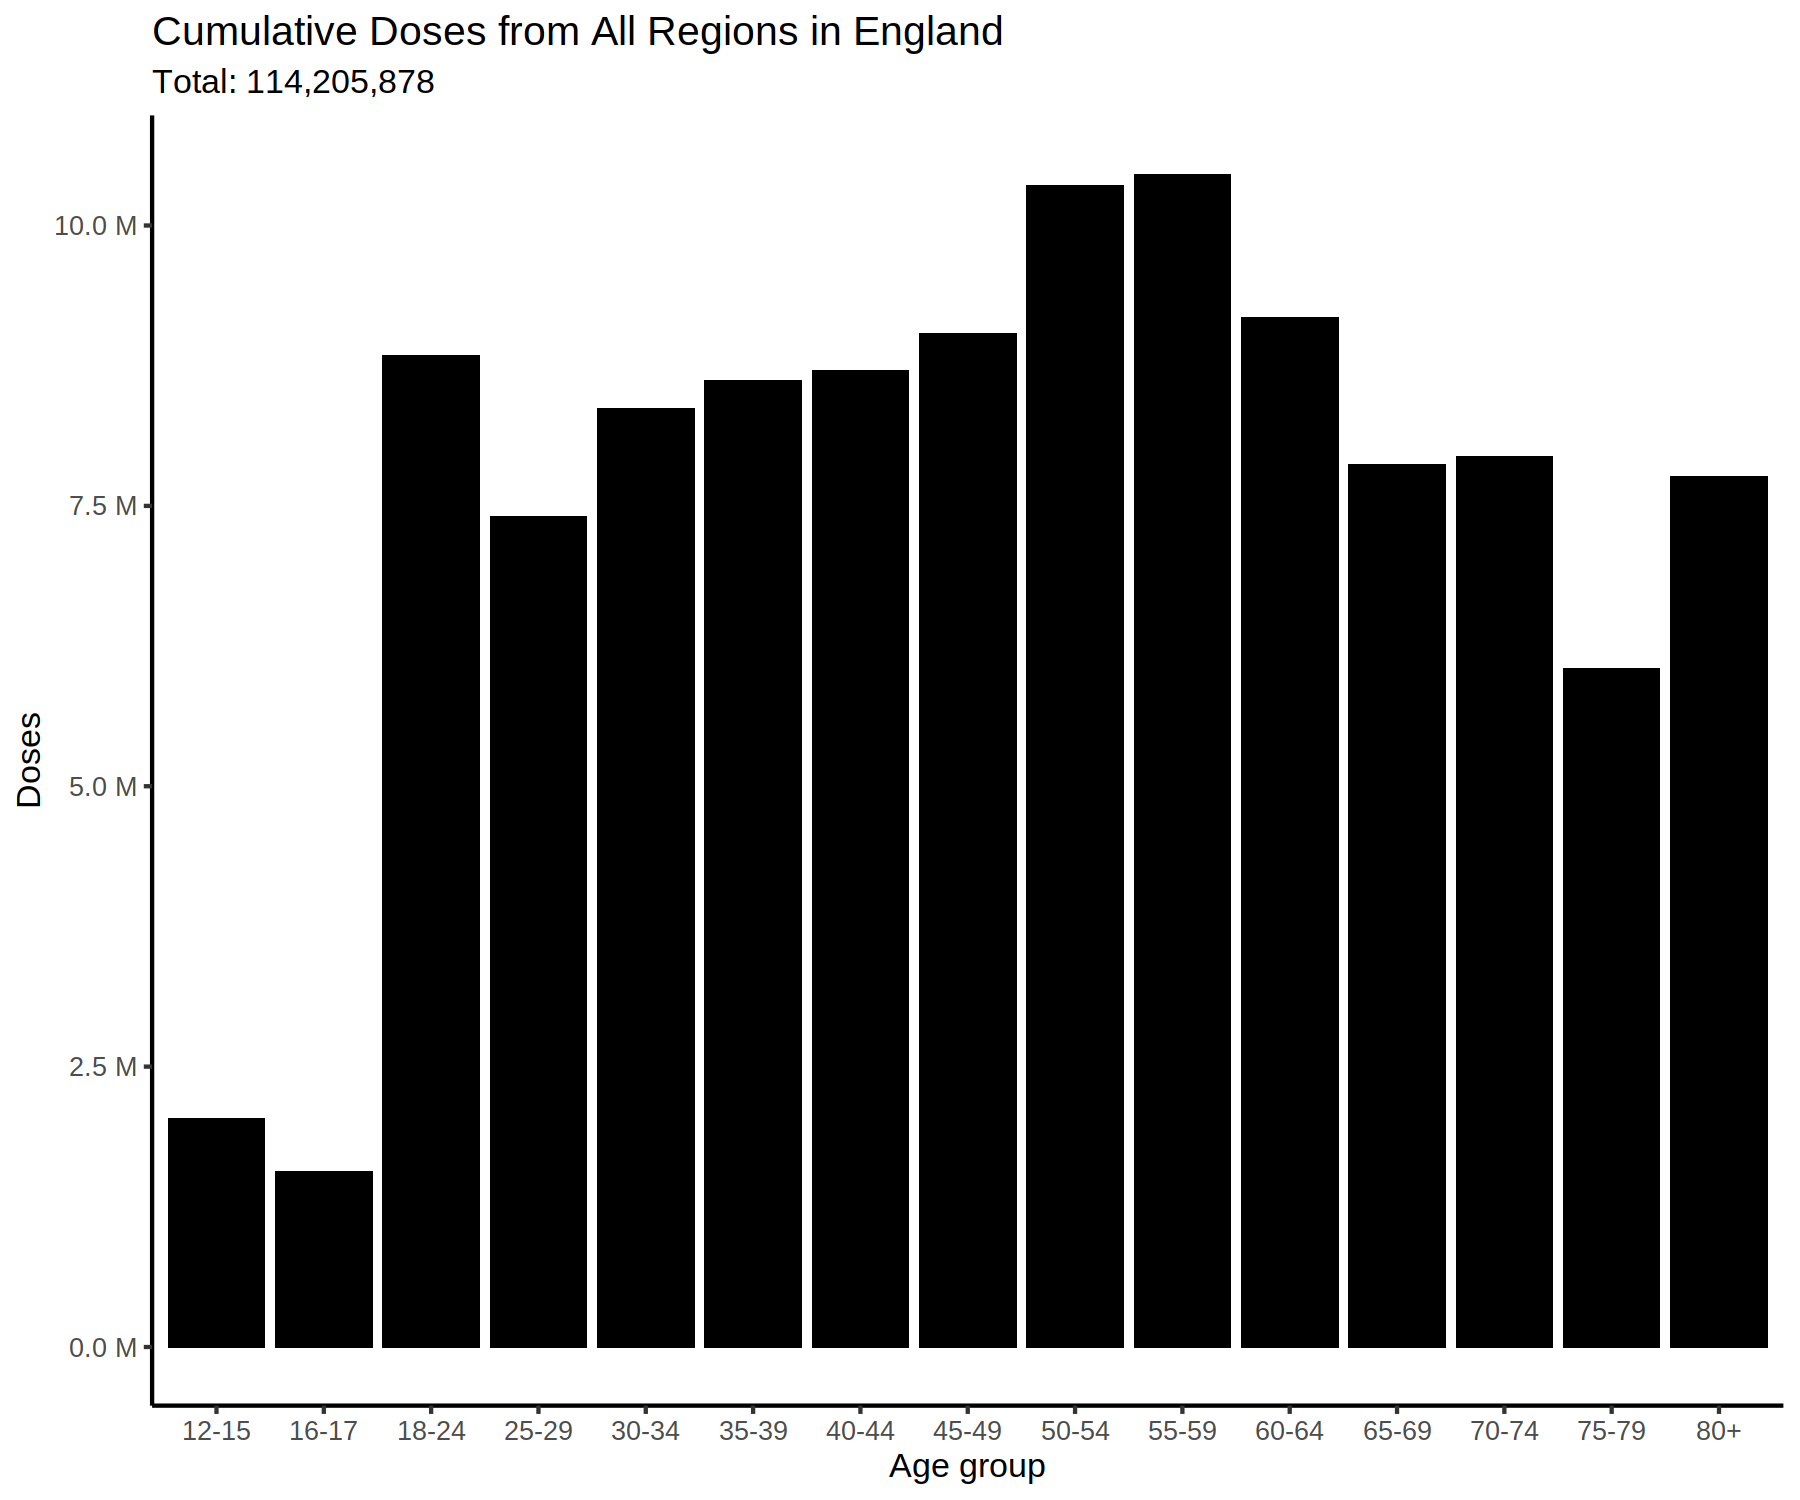

In [29]:
total <- dat1 %>% summarise(sum(Count)) %>% pull()
total <- label_comma(accuracy = 1)(total)

dat1 %>% group_by(AgeGroup, Dose) %>% summarise(Doses = sum(Count)) %>%
    ggplot(aes(AgeGroup, Doses)) + geom_col(fill = "black") + theme_classic(base_size = 16) +
    scale_y_continuous(labels = unit_format(unit = "M", scale = 1e-6)) + 
    labs(title = "Cumulative Doses from All Regions in England", 
         subtitle = paste("Total:", total), x = "Age group")

### Cumulative COVID-19 doses by NHS region of residence and age group

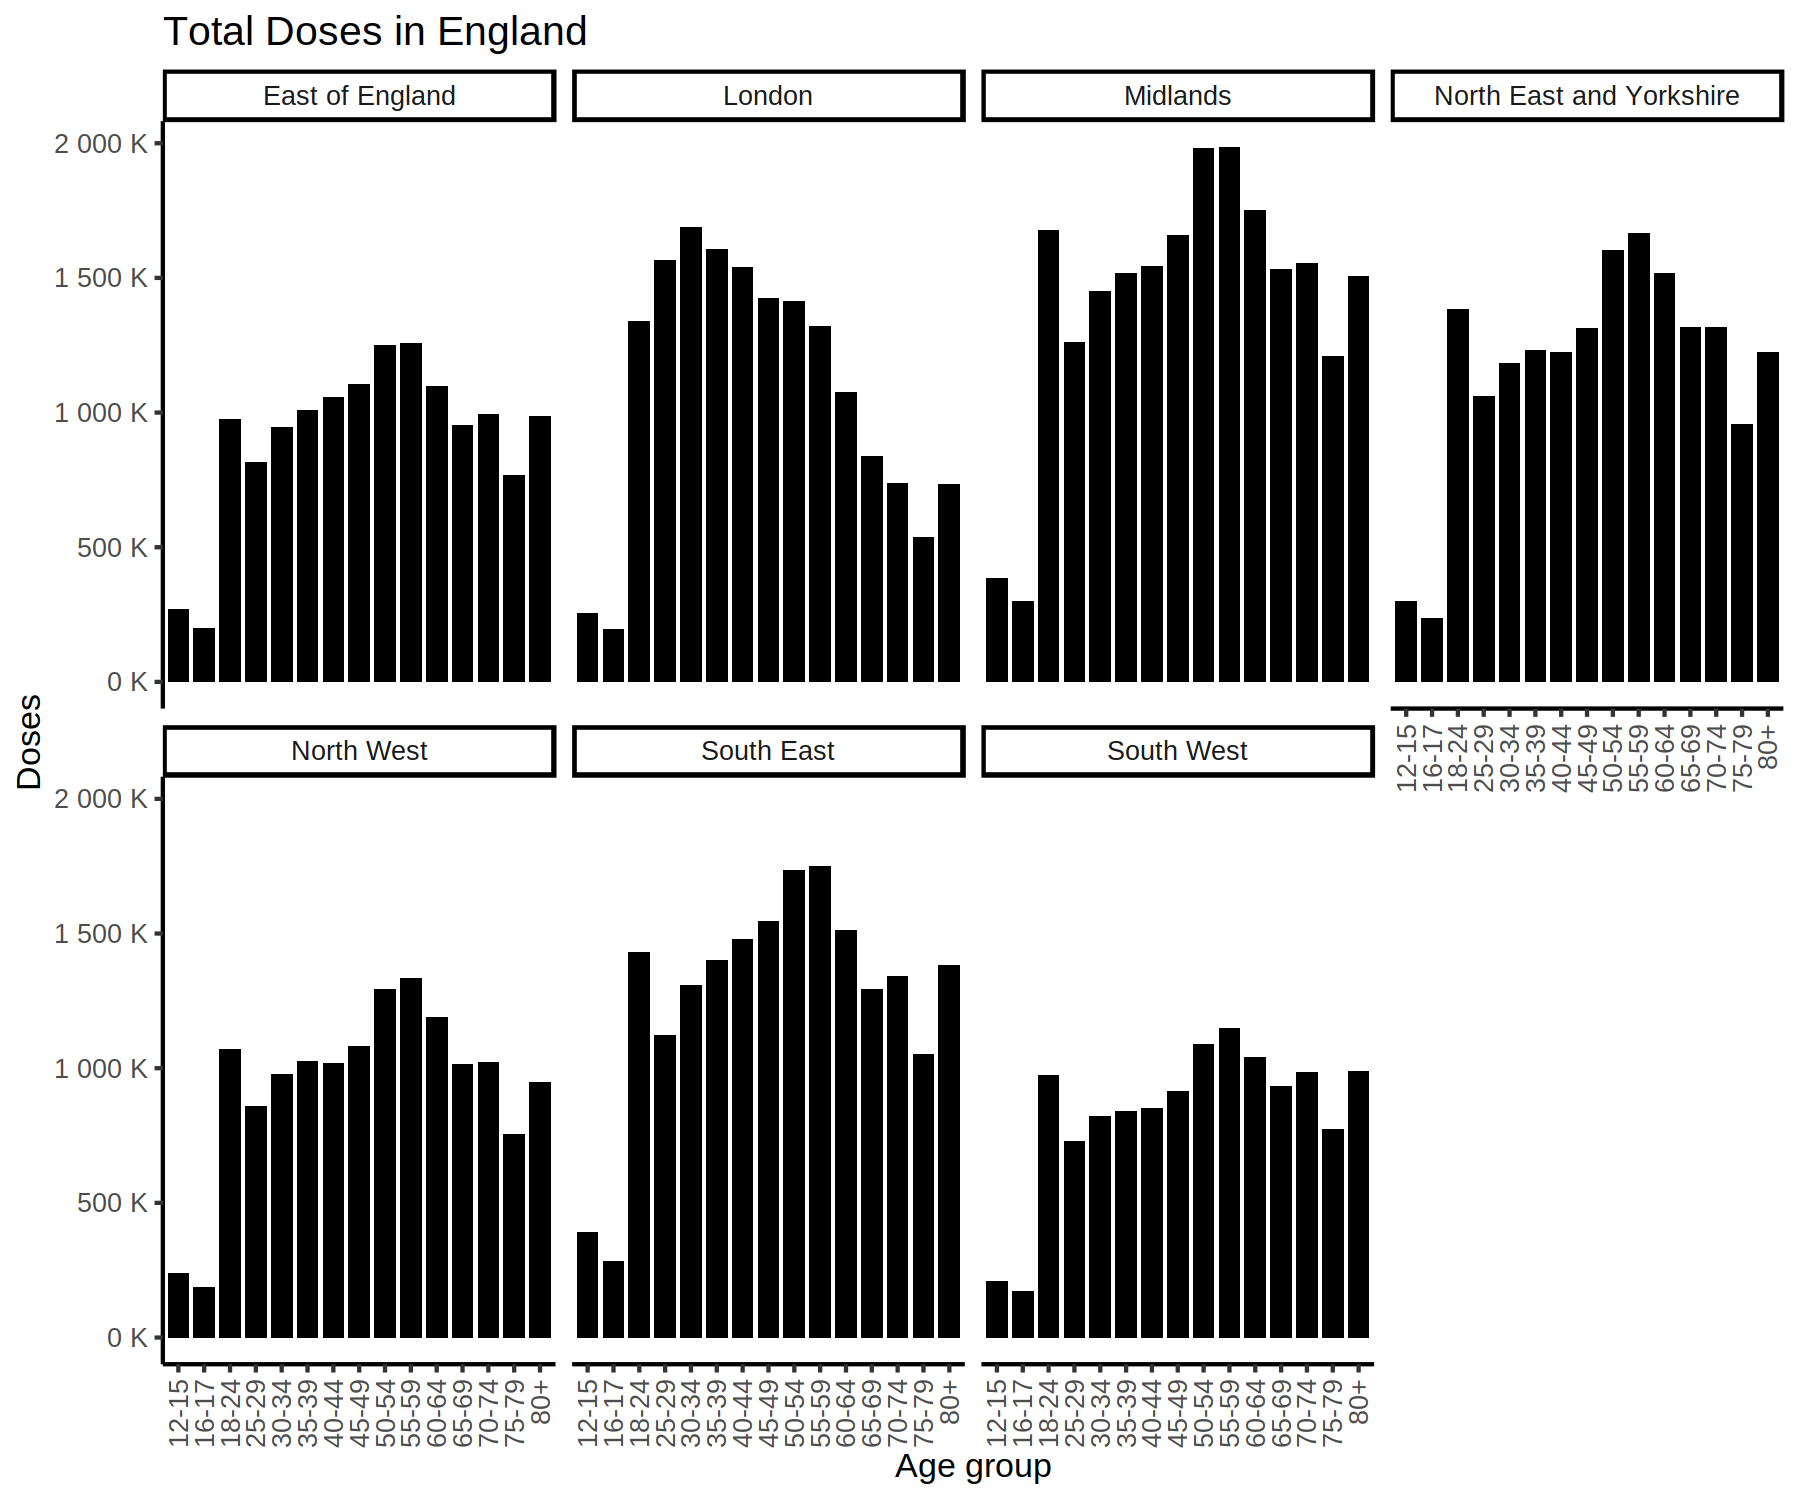

In [30]:
ggplot(dat1, aes(AgeGroup, Count)) + geom_col(fill = "black", width = 0.8) + 
    facet_wrap(~ Region, ncol = 4) + theme_classic(base_size = 16) +
    scale_y_continuous(labels = unit_format(unit = "K", scale = 1e-3)) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) +
    labs(title = "Total Doses in England", x = "Age group", y = "Doses")

### Total COVID-19 doses by NHS region of residence and age group, coloured by 1st and 2nd dose

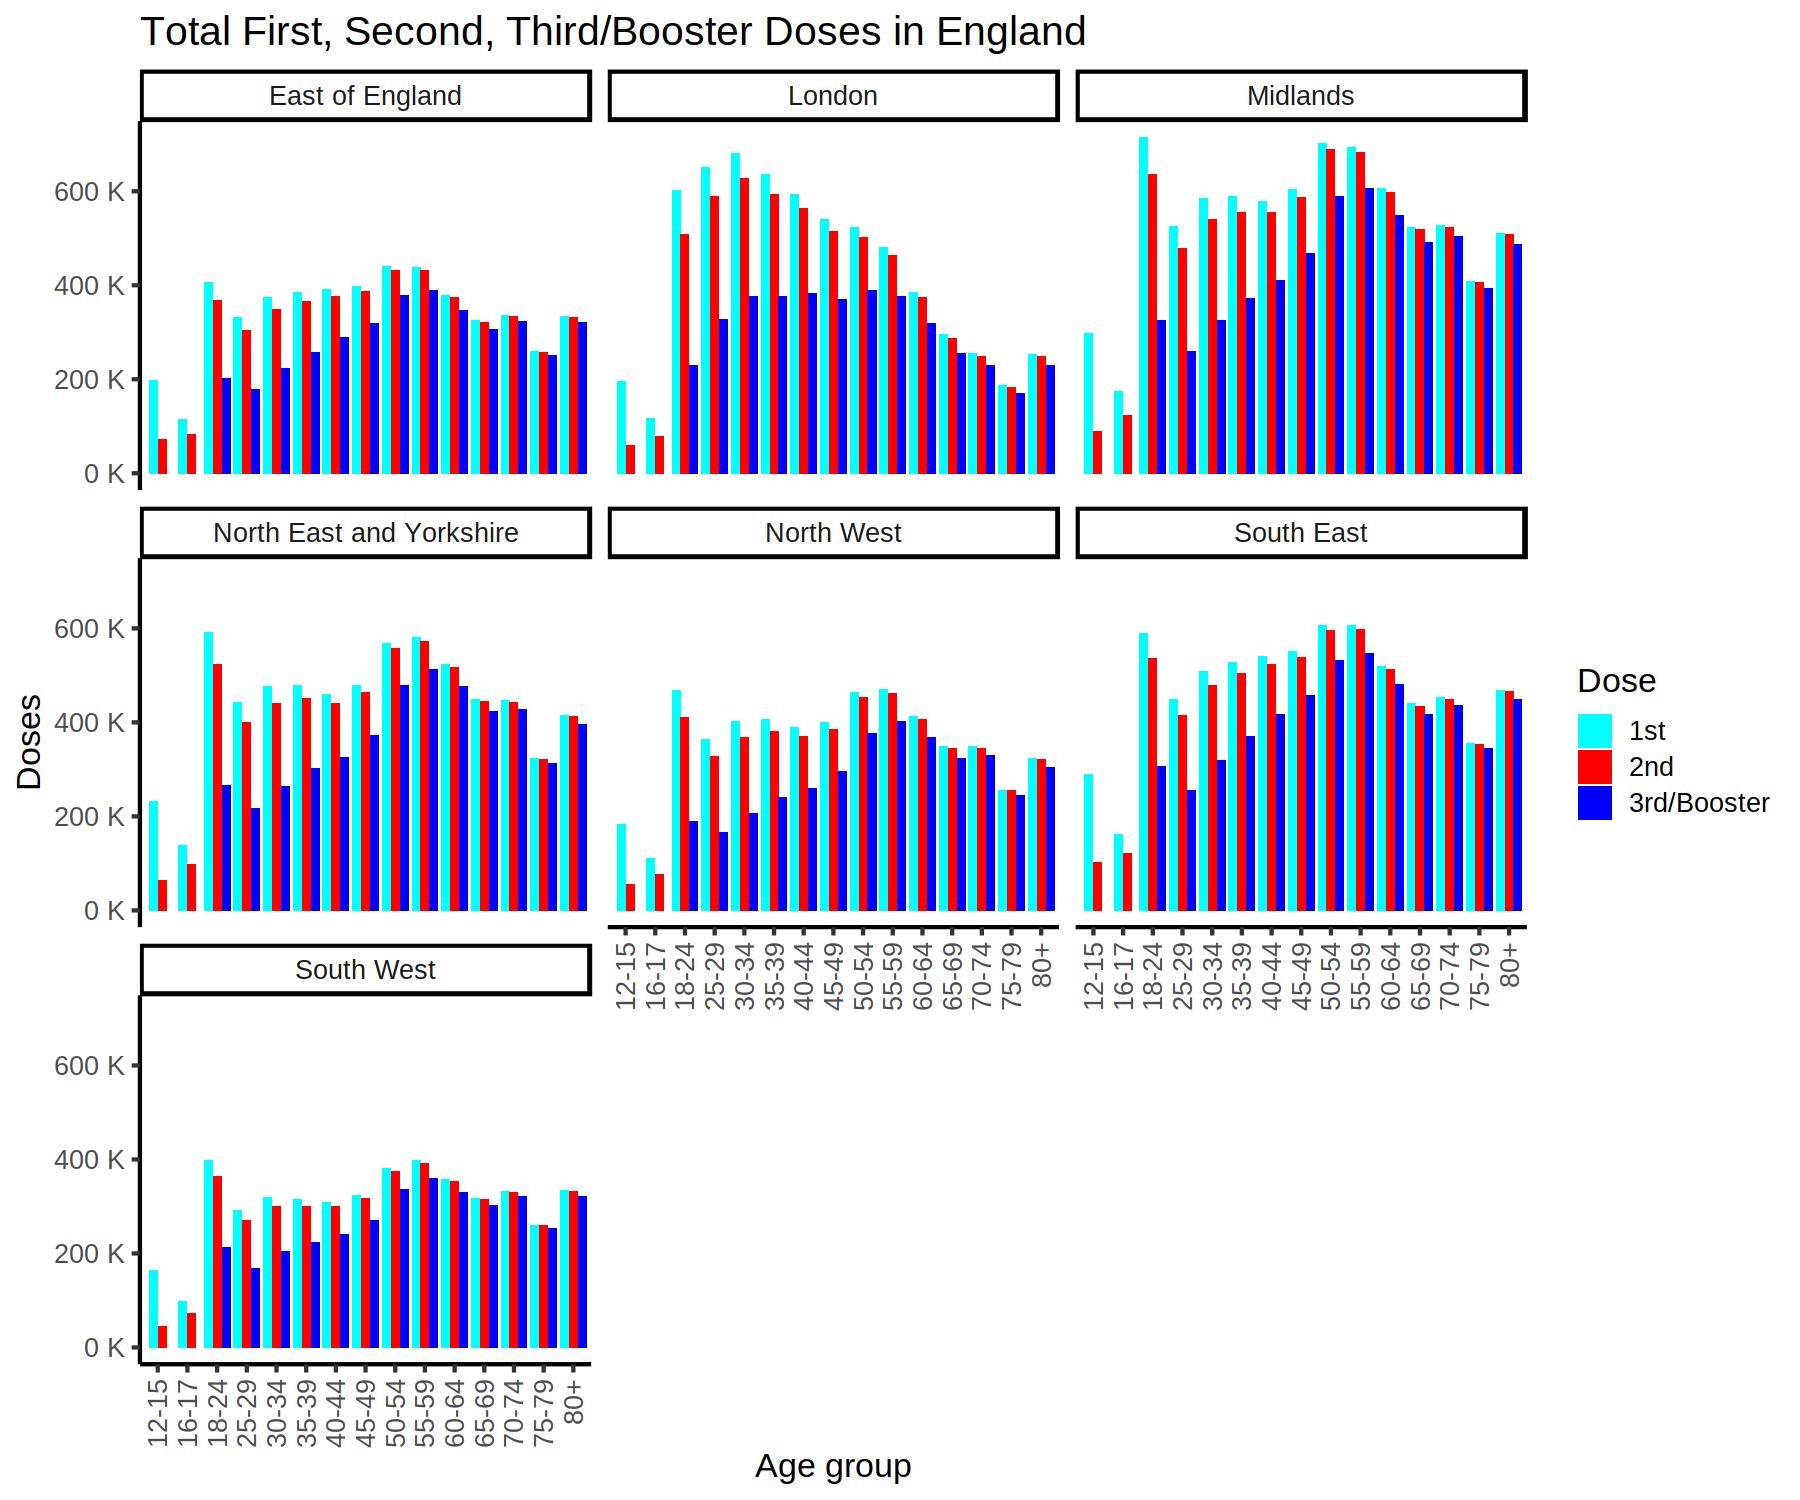

In [31]:
ggplot(dat1, aes(AgeGroup, Count, fill = Dose)) + 
    geom_col(position = position_dodge2(width = 0.9, padding = 0.1, preserve = "single")) +
    facet_wrap(~ Region, ncol = 3) + theme_classic(base_size = 16) +
    scale_y_continuous(labels = unit_format(unit = "K", scale = 1e-3)) + 
    scale_fill_manual(values = c("cyan","red","blue"), labels = c("1st","2nd","3rd/Booster")) + 
    theme(legend.position = "right", axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) +
    labs(title = "Total First, Second, Third/Booster Doses in England", x = "Age group", y = "Doses")

### Percentage of estimated population receiving COVID-19 vaccination, coloured by 1st and 2nd dose

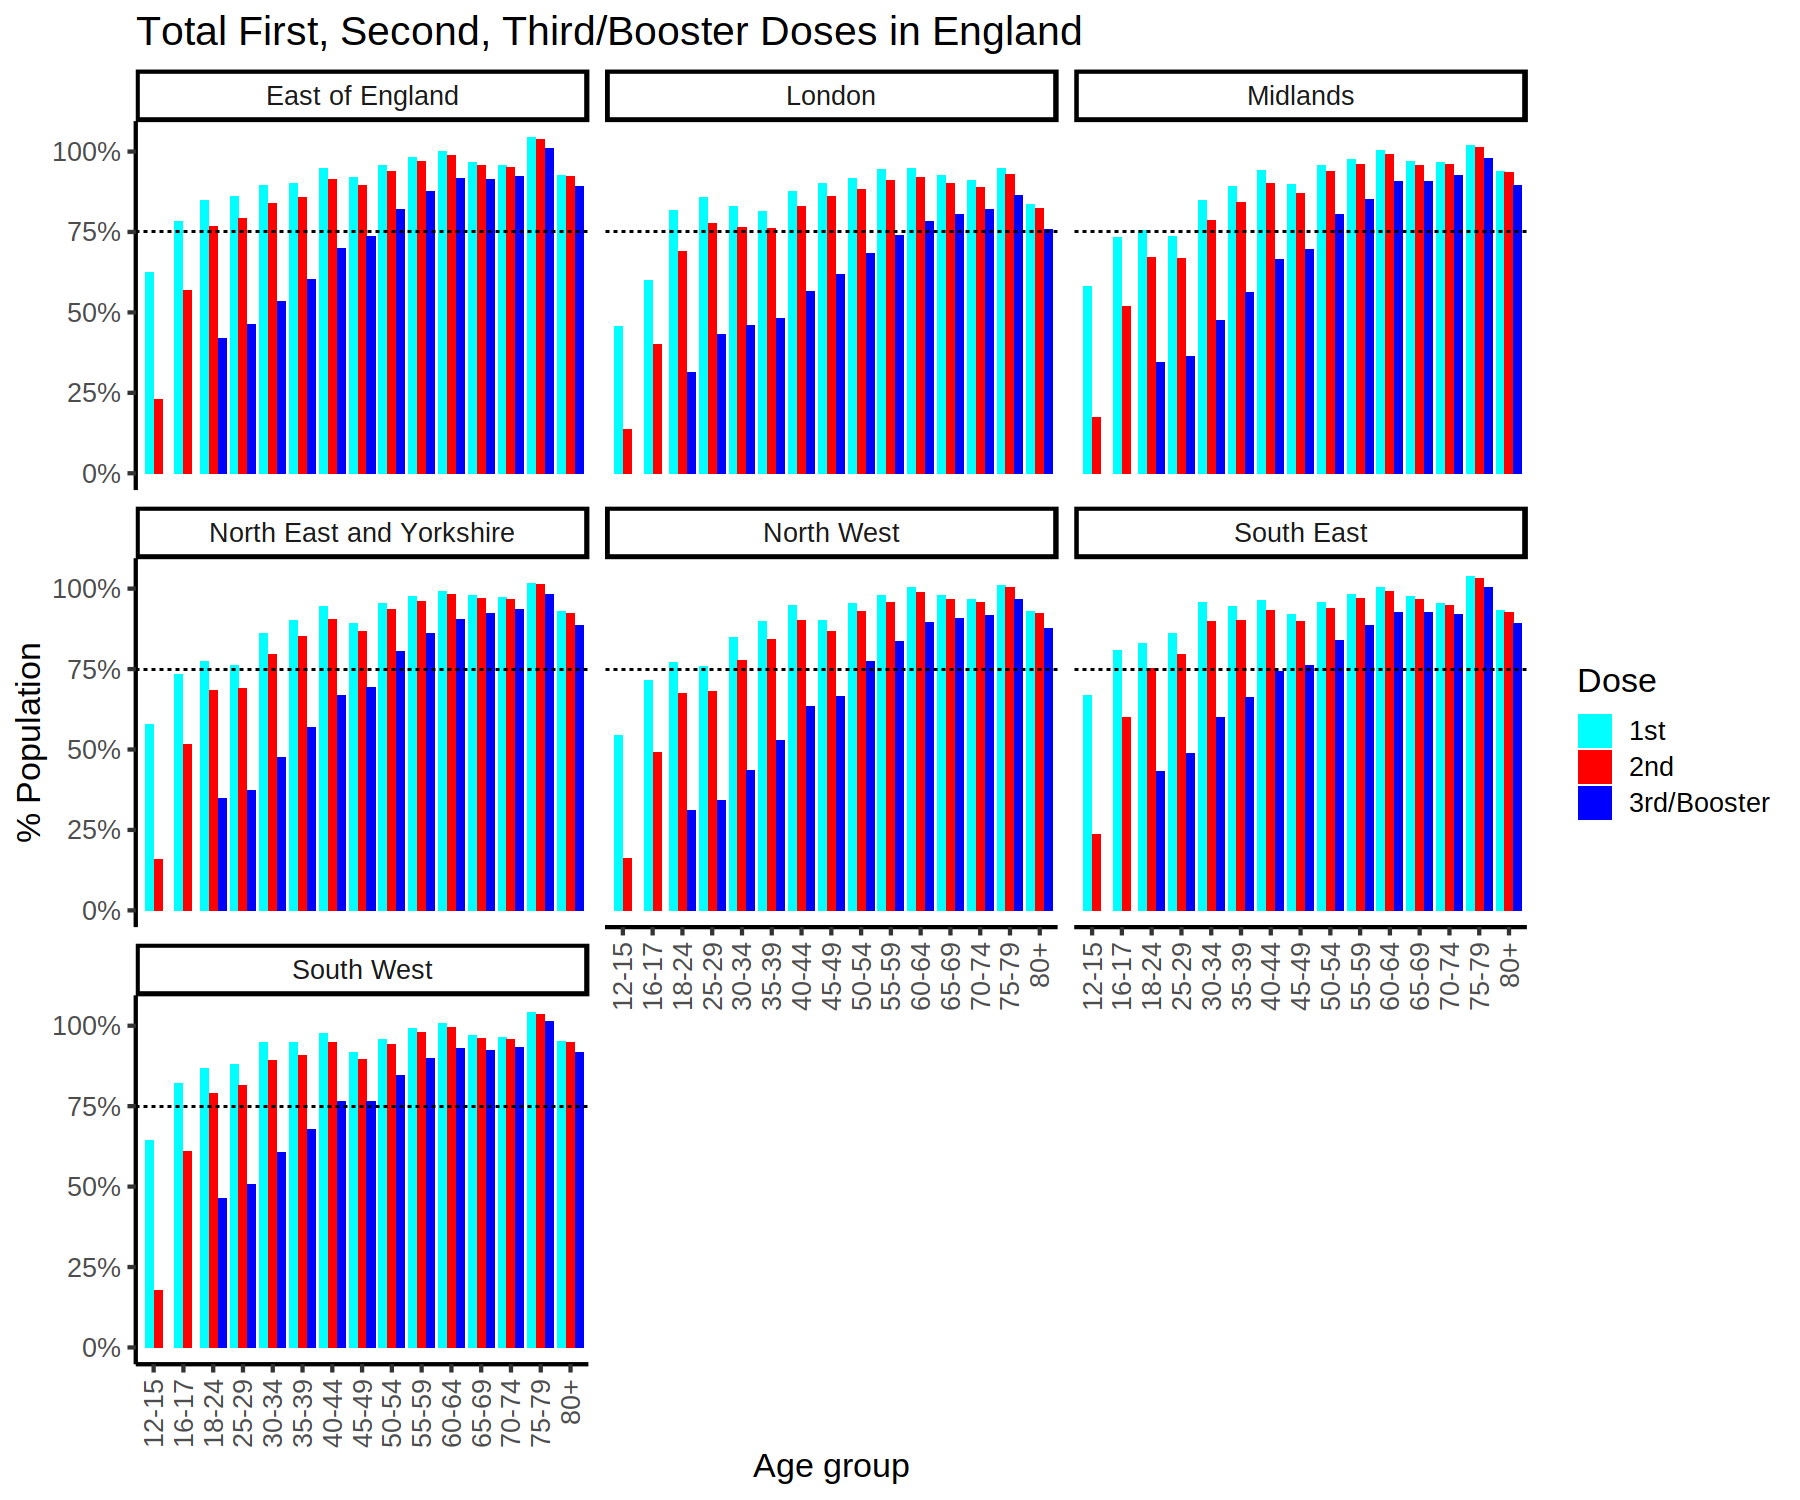

In [32]:
ggplot(dat1, aes(AgeGroup, Fraction, fill = Dose)) + 
    geom_col(position = position_dodge2(width = 0.9, padding = 0.1, preserve = "single")) + 
    facet_wrap(~ Region, ncol = 3) + theme_classic(base_size = 16) +
    scale_y_continuous(labels = percent_format(accuracy = 1)) + geom_hline(yintercept = 0.75, linetype = 2) +
    scale_fill_manual(values = c("cyan","red","blue"), labels = c("1st","2nd","3rd/Booster")) + 
    theme(legend.position = "right", axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) +
    labs(title = "Total First, Second, Third/Booster Doses in England", x = "Age group", y = "% Population")

### NIMS population estimates by ethnicity in England

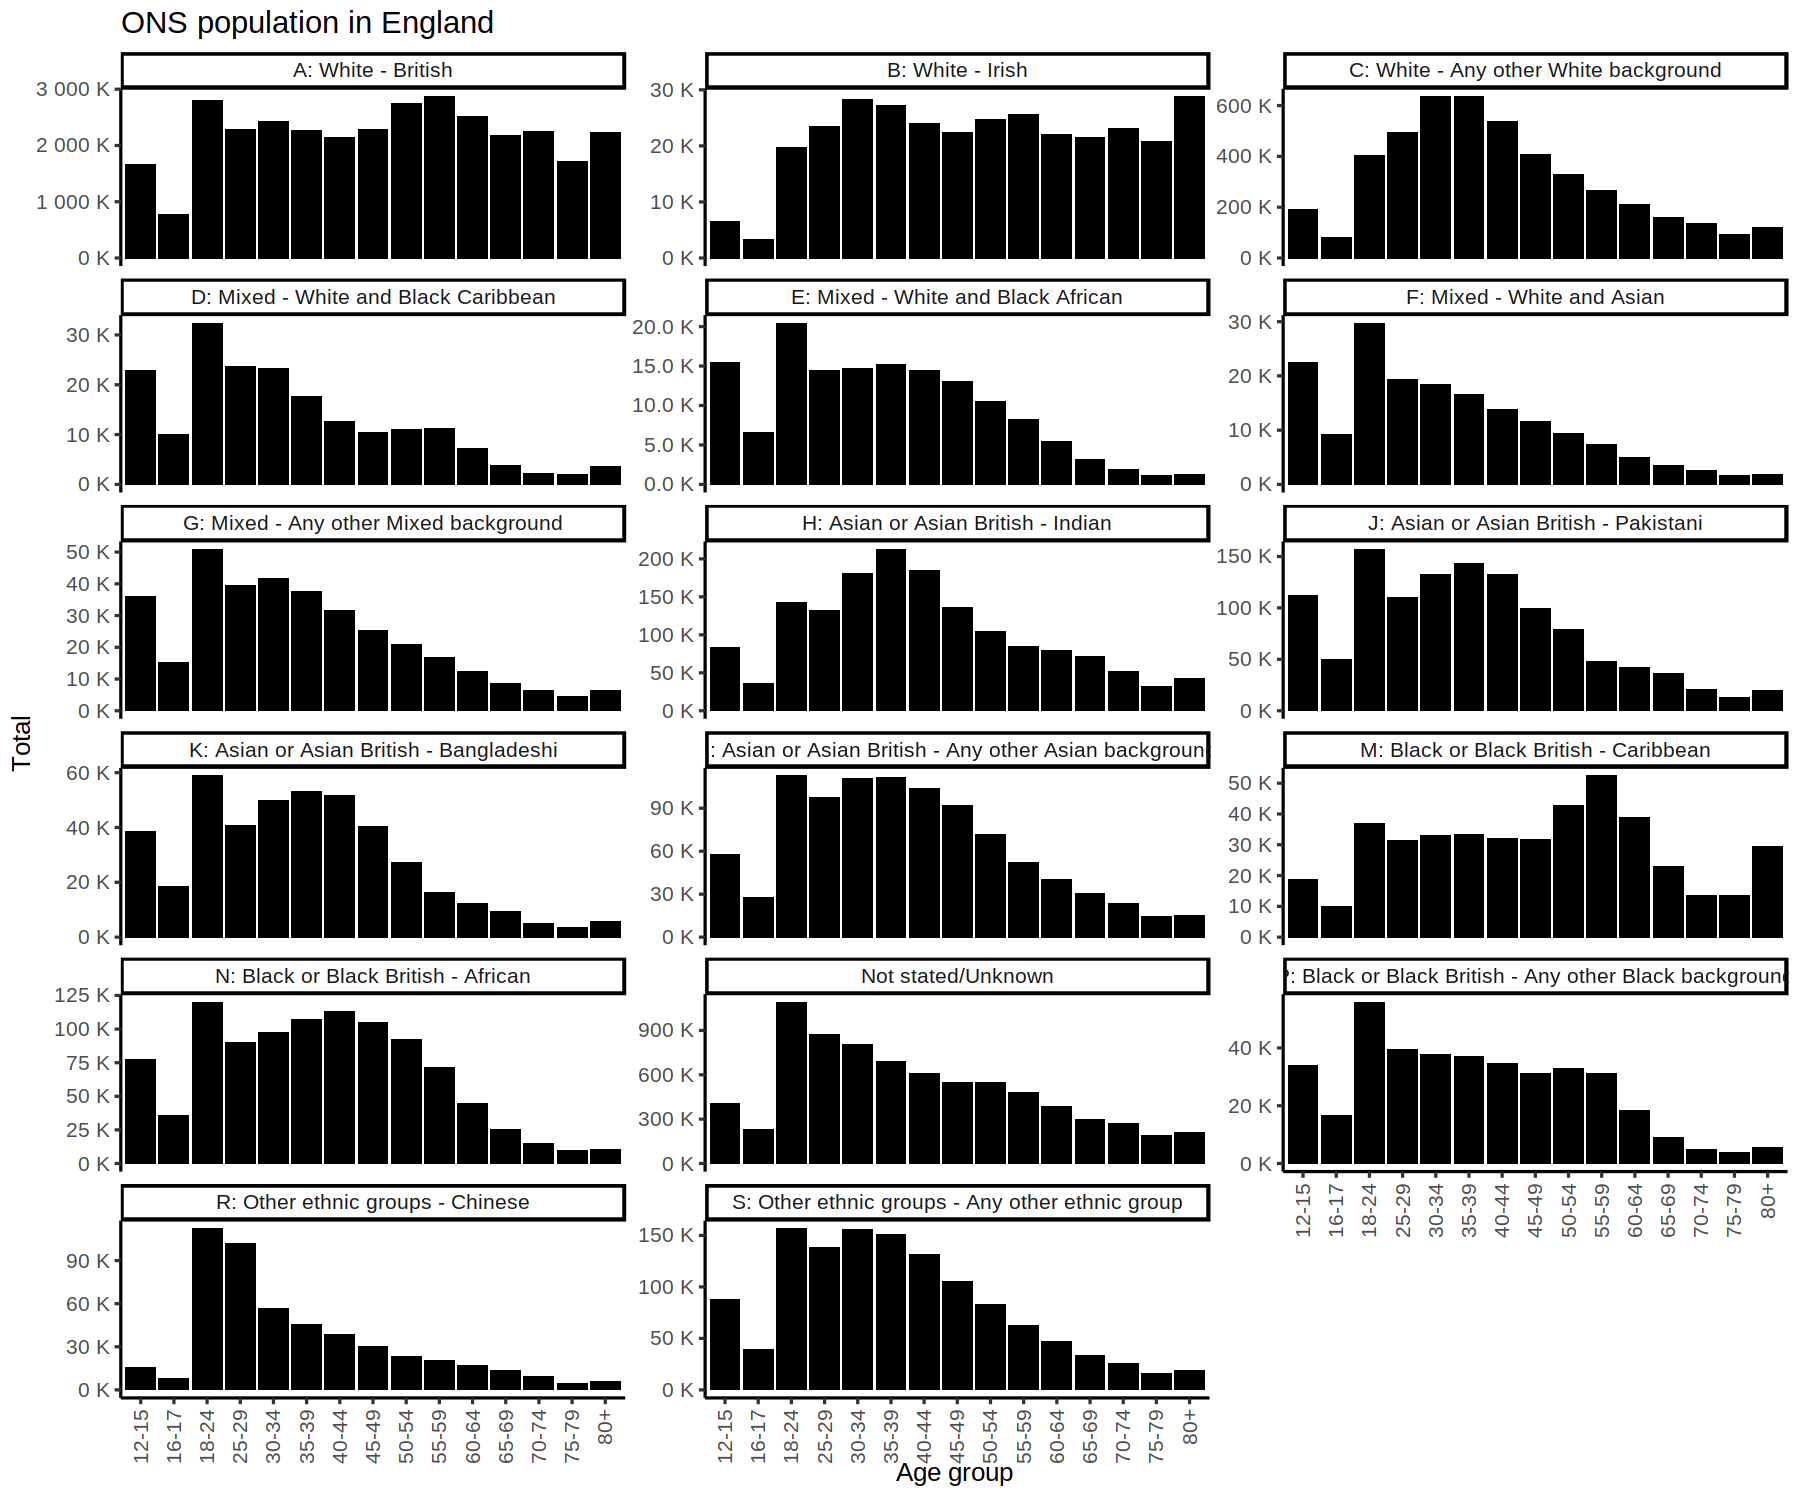

In [33]:
epop %>% ggplot(aes(AgeGroup, Total)) + geom_col(fill = "black") + 
    facet_wrap(~ Ethnicity, ncol = 3, scales = "free_y") + theme_classic(base_size = 12) +
    scale_y_continuous(labels = unit_format(unit = "K", scale = 1e-3)) + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) +
    labs(title = "ONS population in England", x = "Age group")

### Percentage of estimated population by ethnicity receiving COVID-19 vaccination, coloured by 1st and 2nd dose

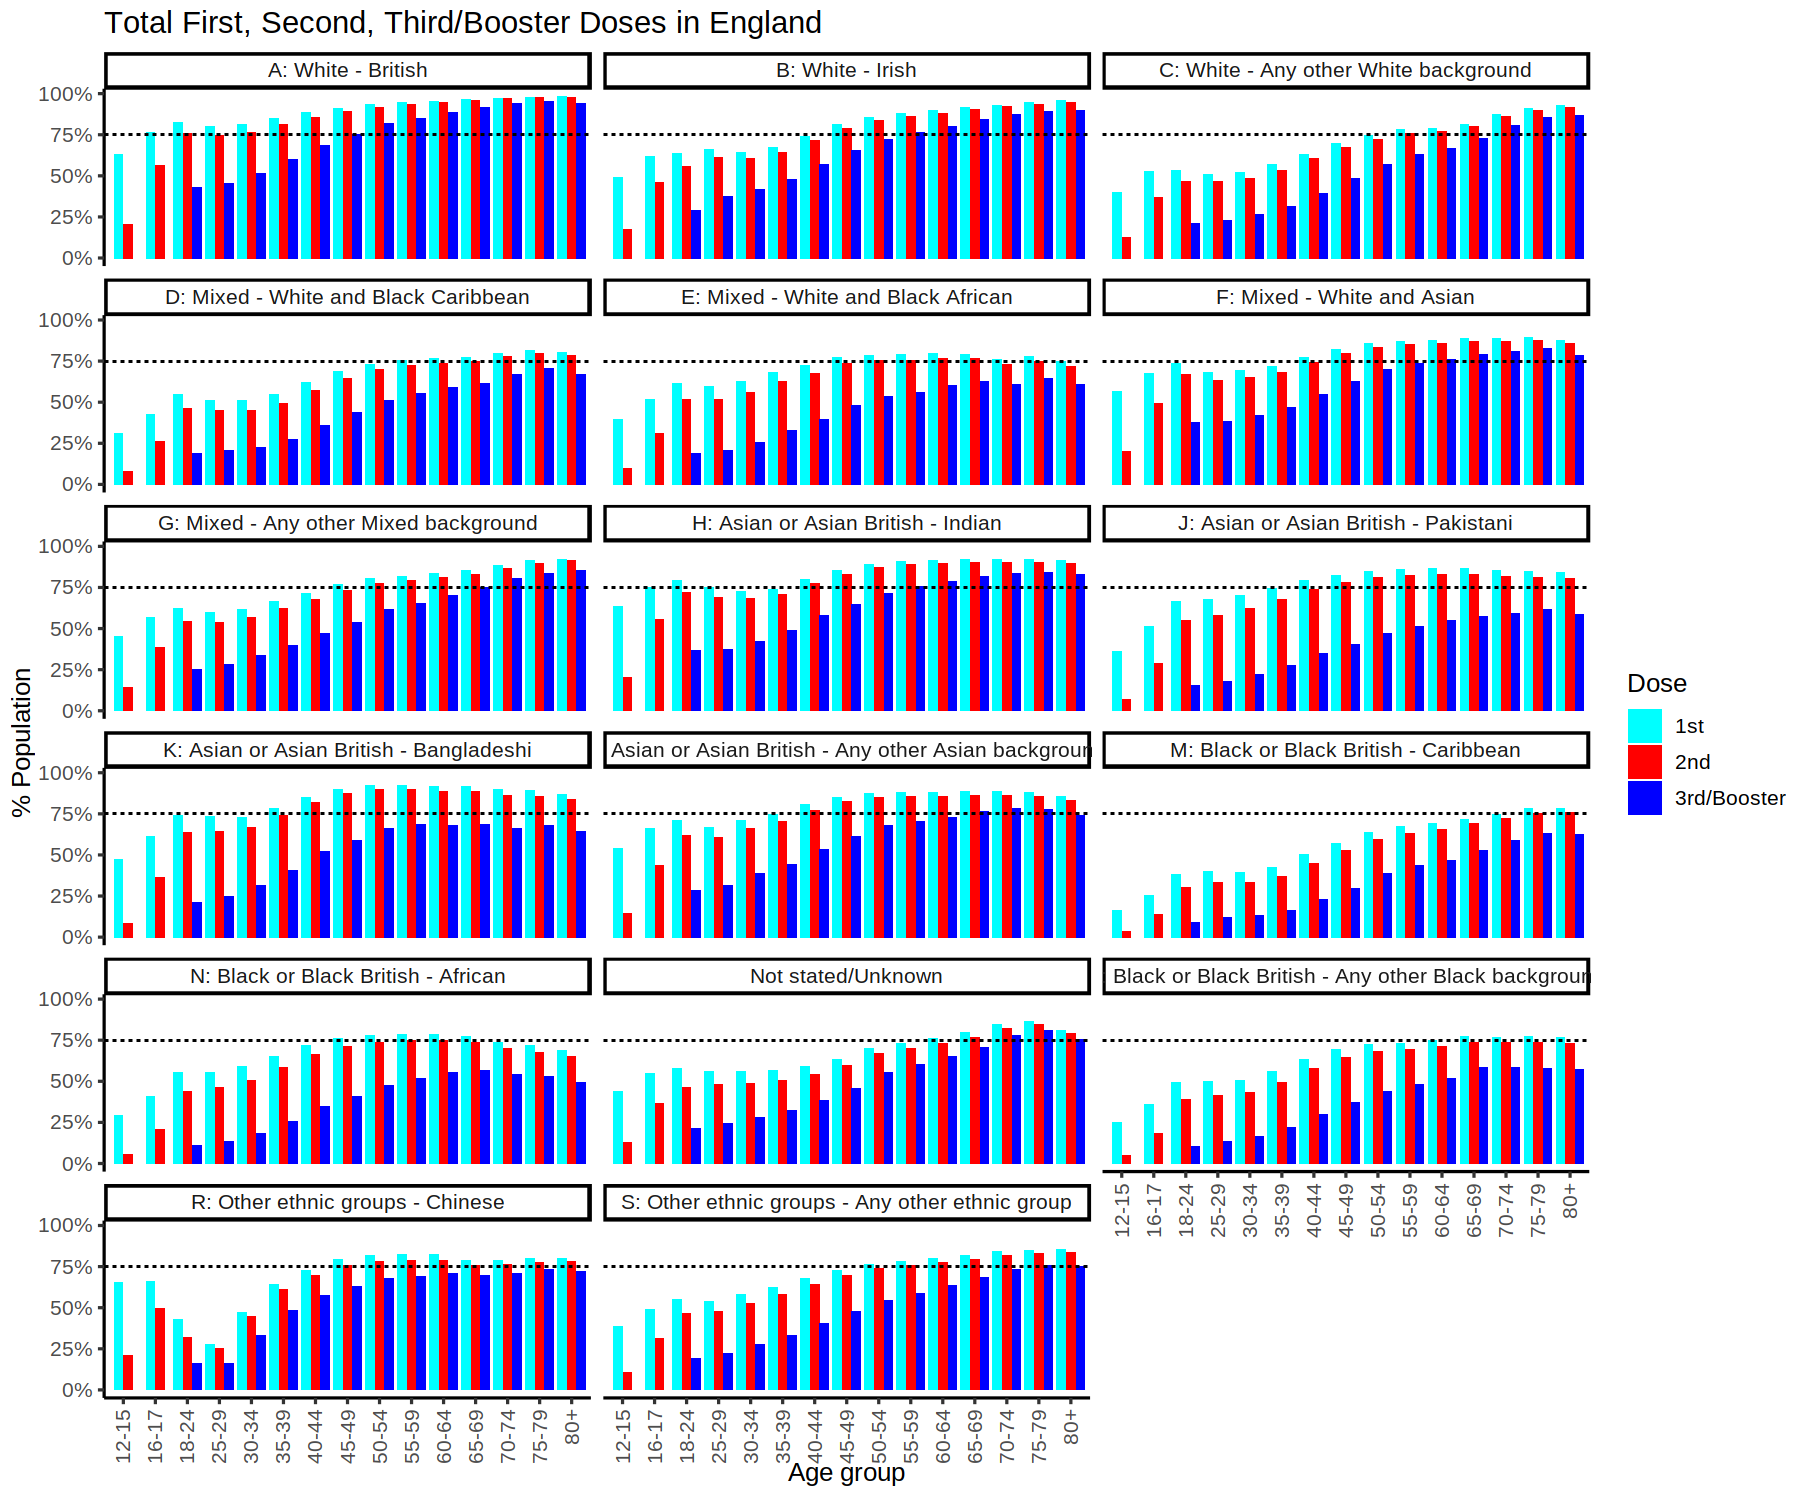

In [34]:
ggplot(dat3, aes(AgeGroup, Fraction, fill = Dose)) + 
    geom_col(position = position_dodge2(width = 0.9, padding = 0.1, preserve = "single")) + 
    facet_wrap(~ Ethnicity, ncol = 3) + theme_classic(base_size = 12) +
    scale_y_continuous(labels = percent_format(accuracy = 1)) + geom_hline(yintercept = 0.75, linetype = 2) +
    scale_fill_manual(values = c("cyan","red","blue"), labels = c("1st","2nd","3rd/Booster")) + 
    theme(legend.position = "right", axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) +
    labs(title = "Total First, Second, Third/Booster Doses in England", x = "Age group", y = "% Population")

### COVID-19 cumulative vaccinations by date of vaccination

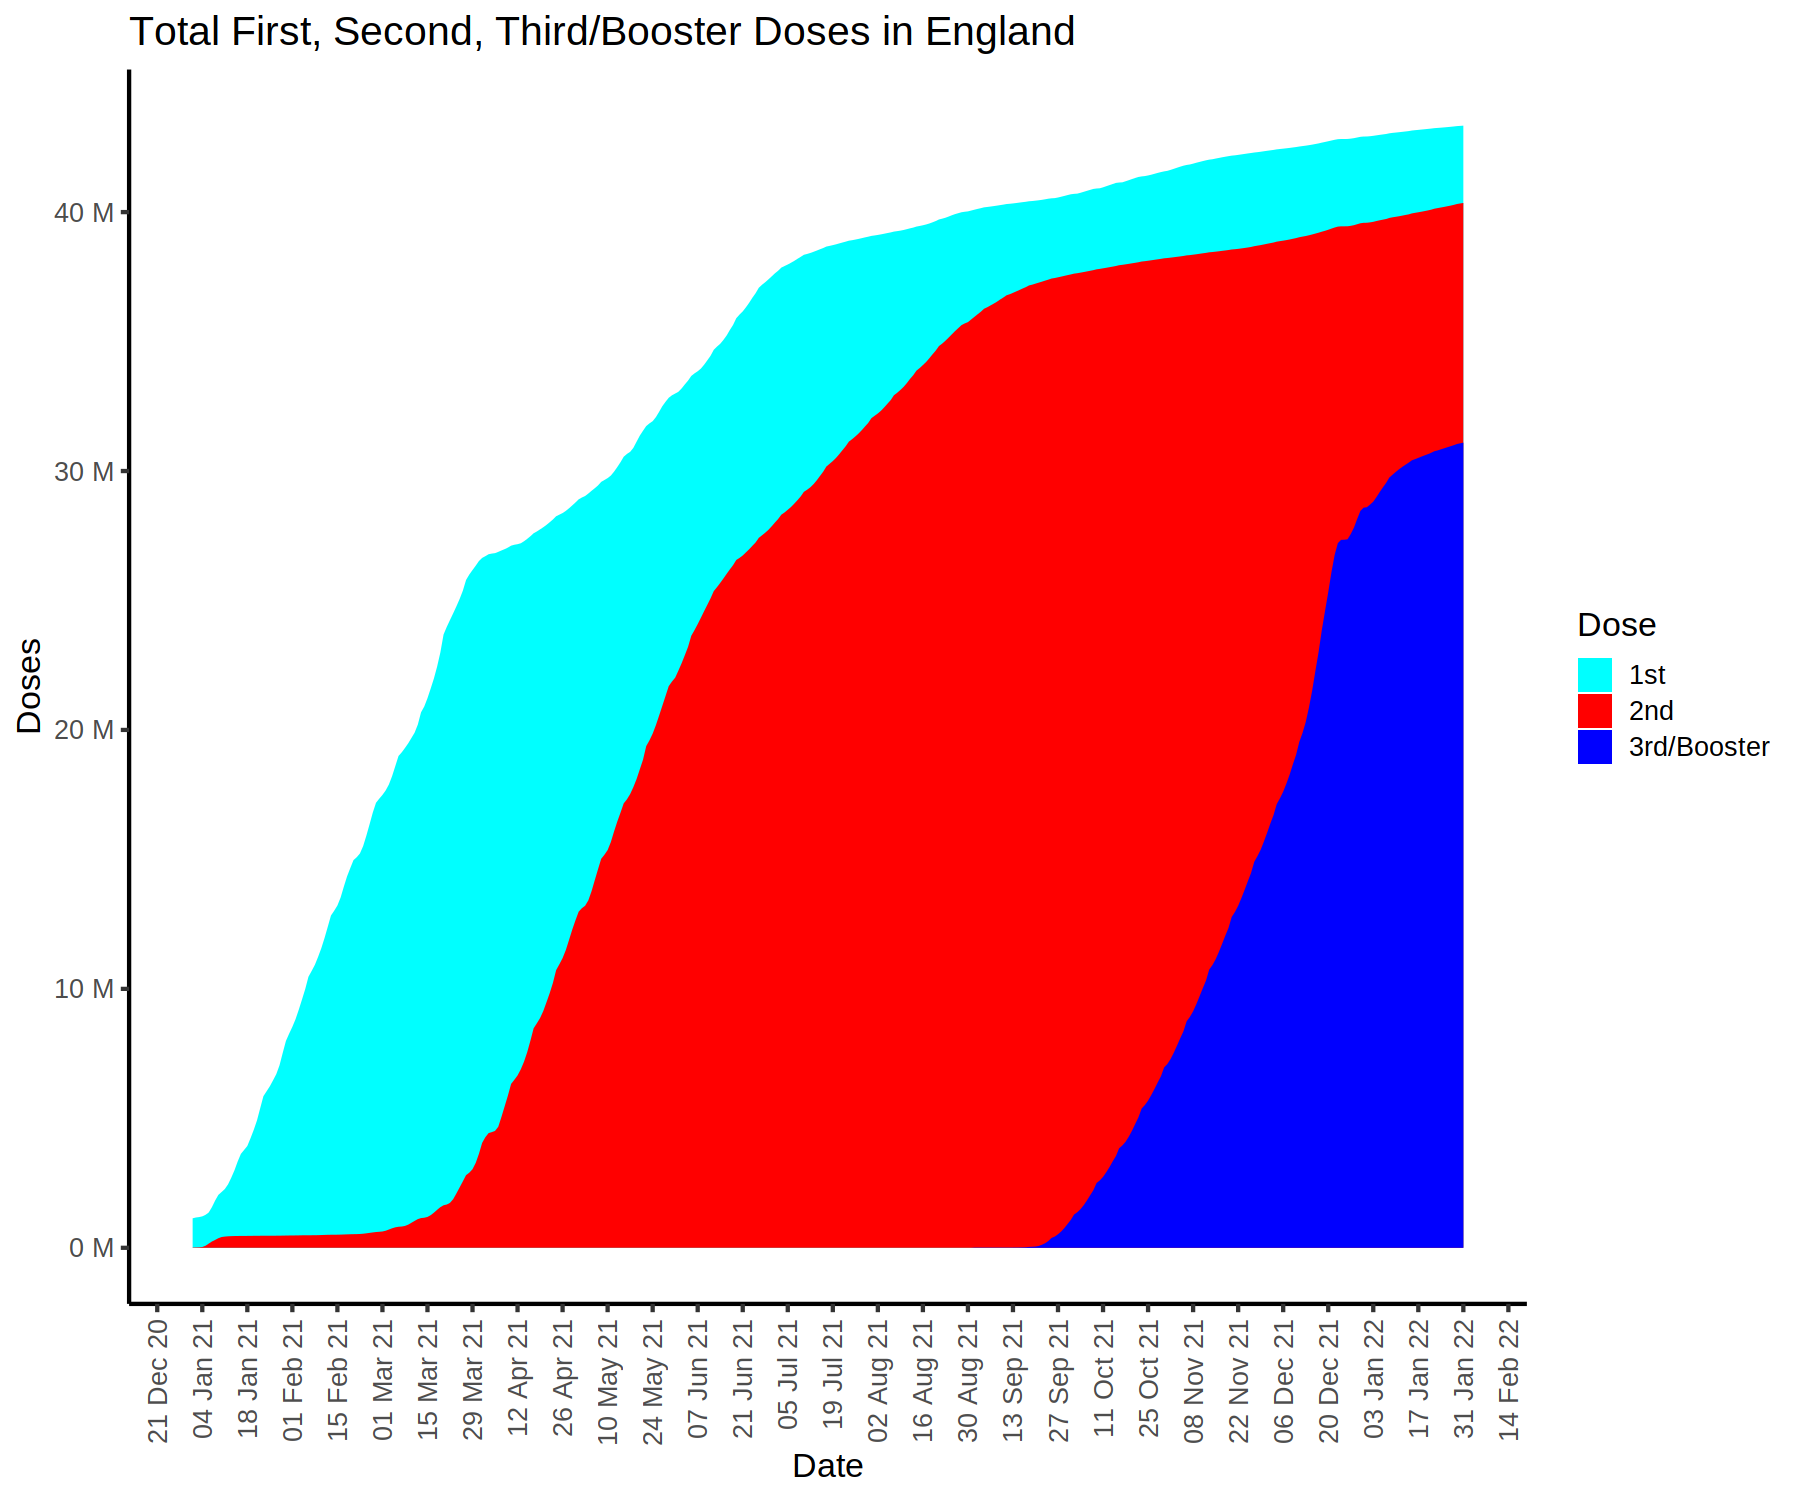

In [35]:
dat2 %>% group_by(Date, Dose) %>% summarise(Count = sum(Count), .groups = "drop") %>%
    ggplot(aes(Date, Count, fill = Dose)) + geom_area(position = position_dodge(width = 0)) + 
    theme_classic(base_size = 16) +
    scale_x_date(date_labels = "%d %b %y", date_breaks = "2 week") +
    scale_y_continuous(labels = unit_format(unit = "M", scale = 1e-6)) +
    scale_fill_manual(values = c("cyan","red","blue"), labels = c("1st","2nd","3rd/Booster")) + 
    theme(legend.position = "right", axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) +
    labs(title = "Total First, Second, Third/Booster Doses in England", x = "Date", y = "Doses")

### COVID-19 cumulative vaccinations by date of vaccination and NHS region of residence

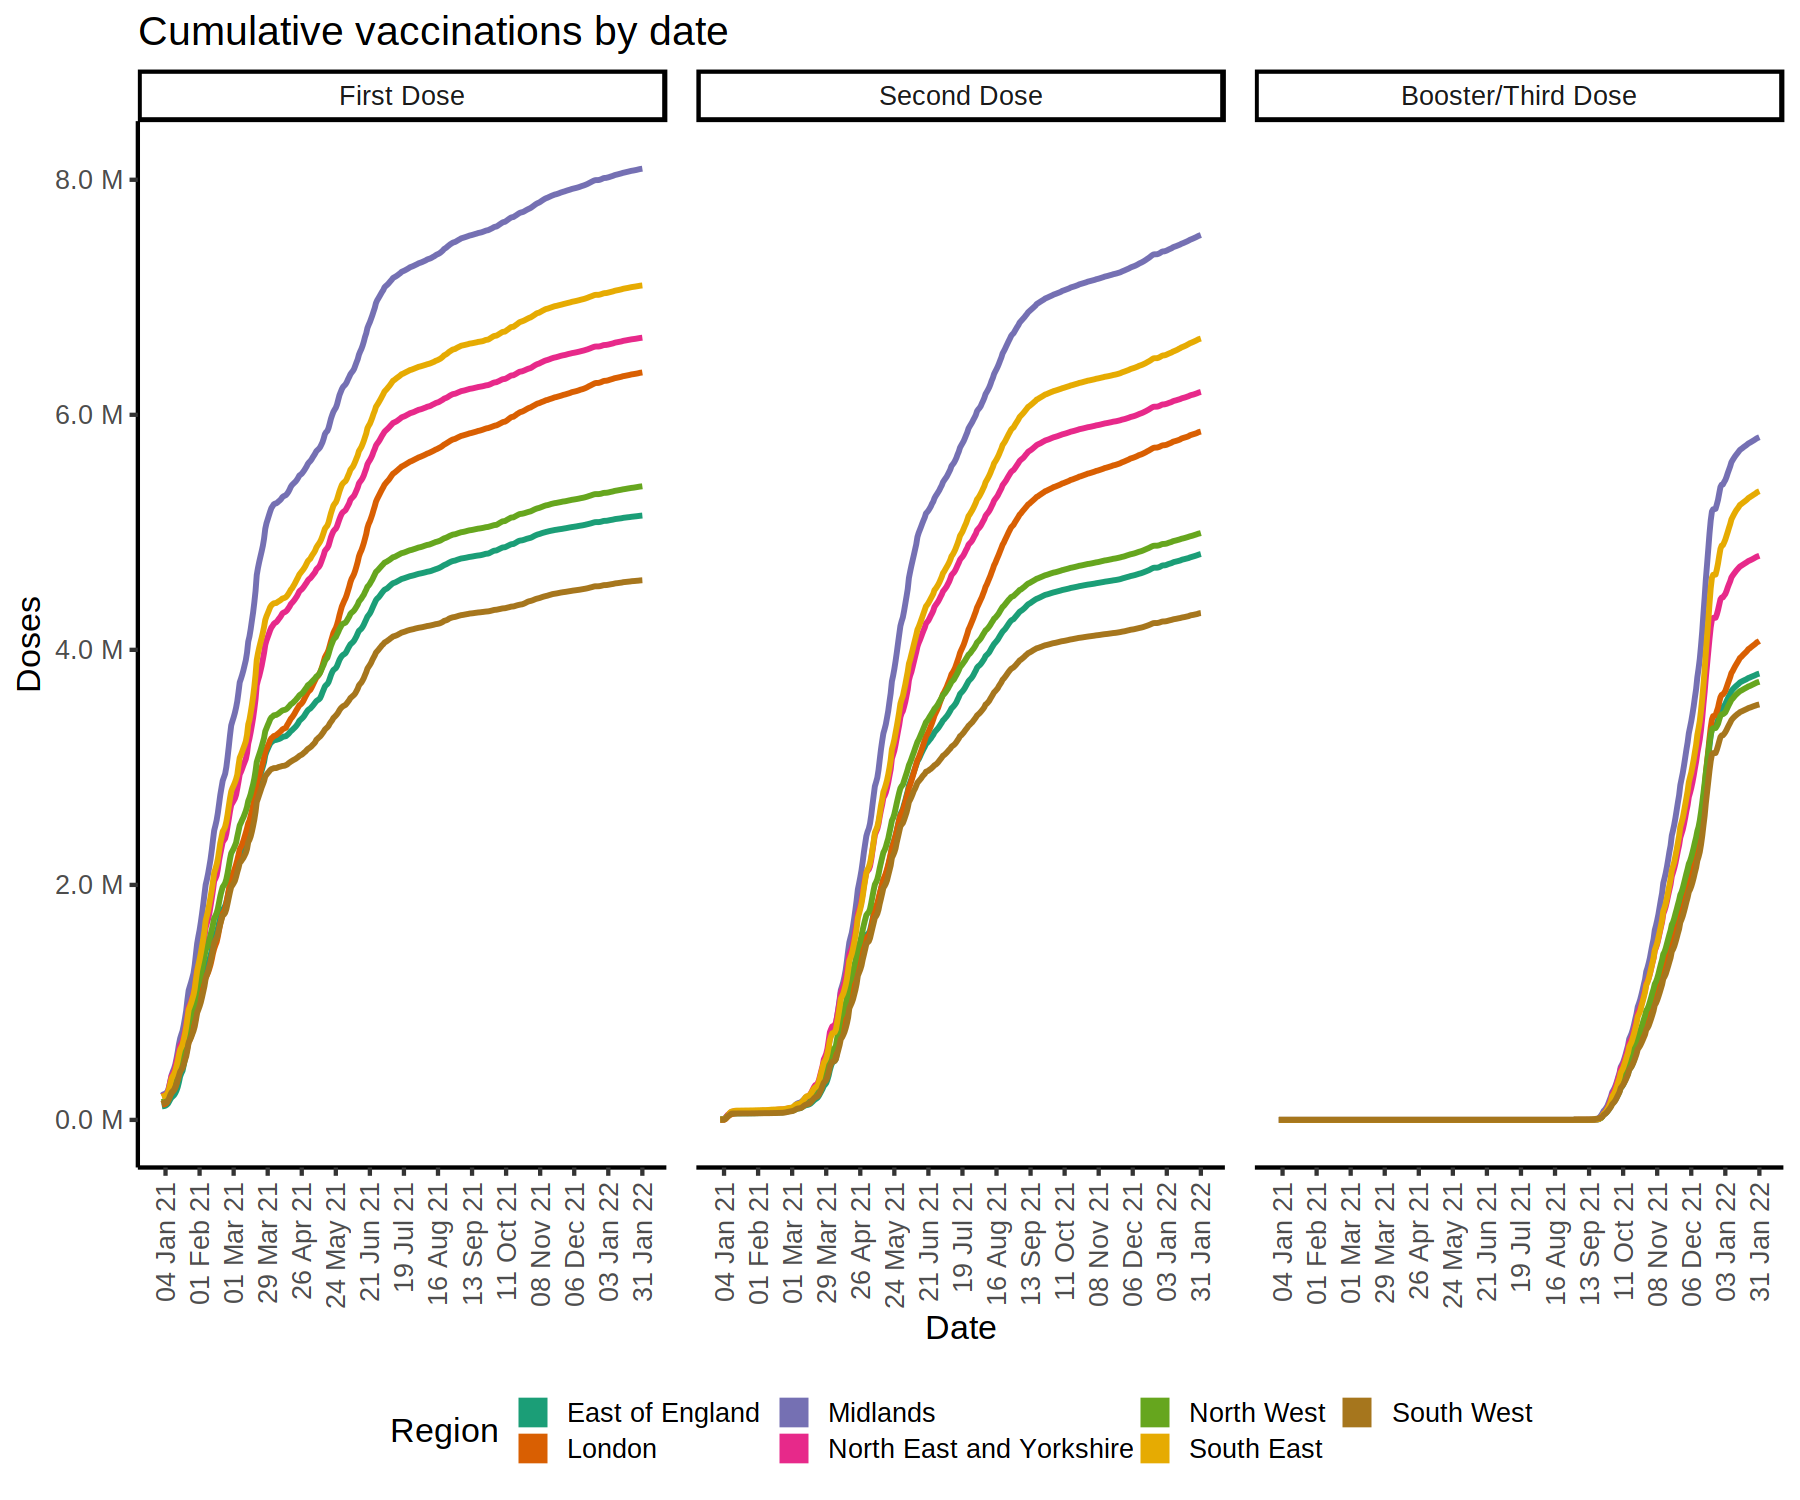

In [36]:
ggplot(dat2, aes(Date, Count, color = Region)) + geom_line(size = 1) + 
    facet_wrap(~ Dose, nrow = 1) + theme_classic(base_size = 16) +
    scale_x_date(date_labels = "%d %b %y", date_breaks = "4 week") +
    scale_y_continuous(labels = unit_format(unit = "M", scale = 1e-6)) +
    scale_color_brewer(palette = "Dark2") + guides(color = guide_legend(override.aes = list(size = 5))) +
    theme(legend.position = "bottom", axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1), 
          panel.spacing = unit(1, "lines")) +
    labs(title = "Cumulative vaccinations by date", x = "Date", y = "Doses")

### Percentage of estimated population receiving COVID-19 vaccination, coloured by region

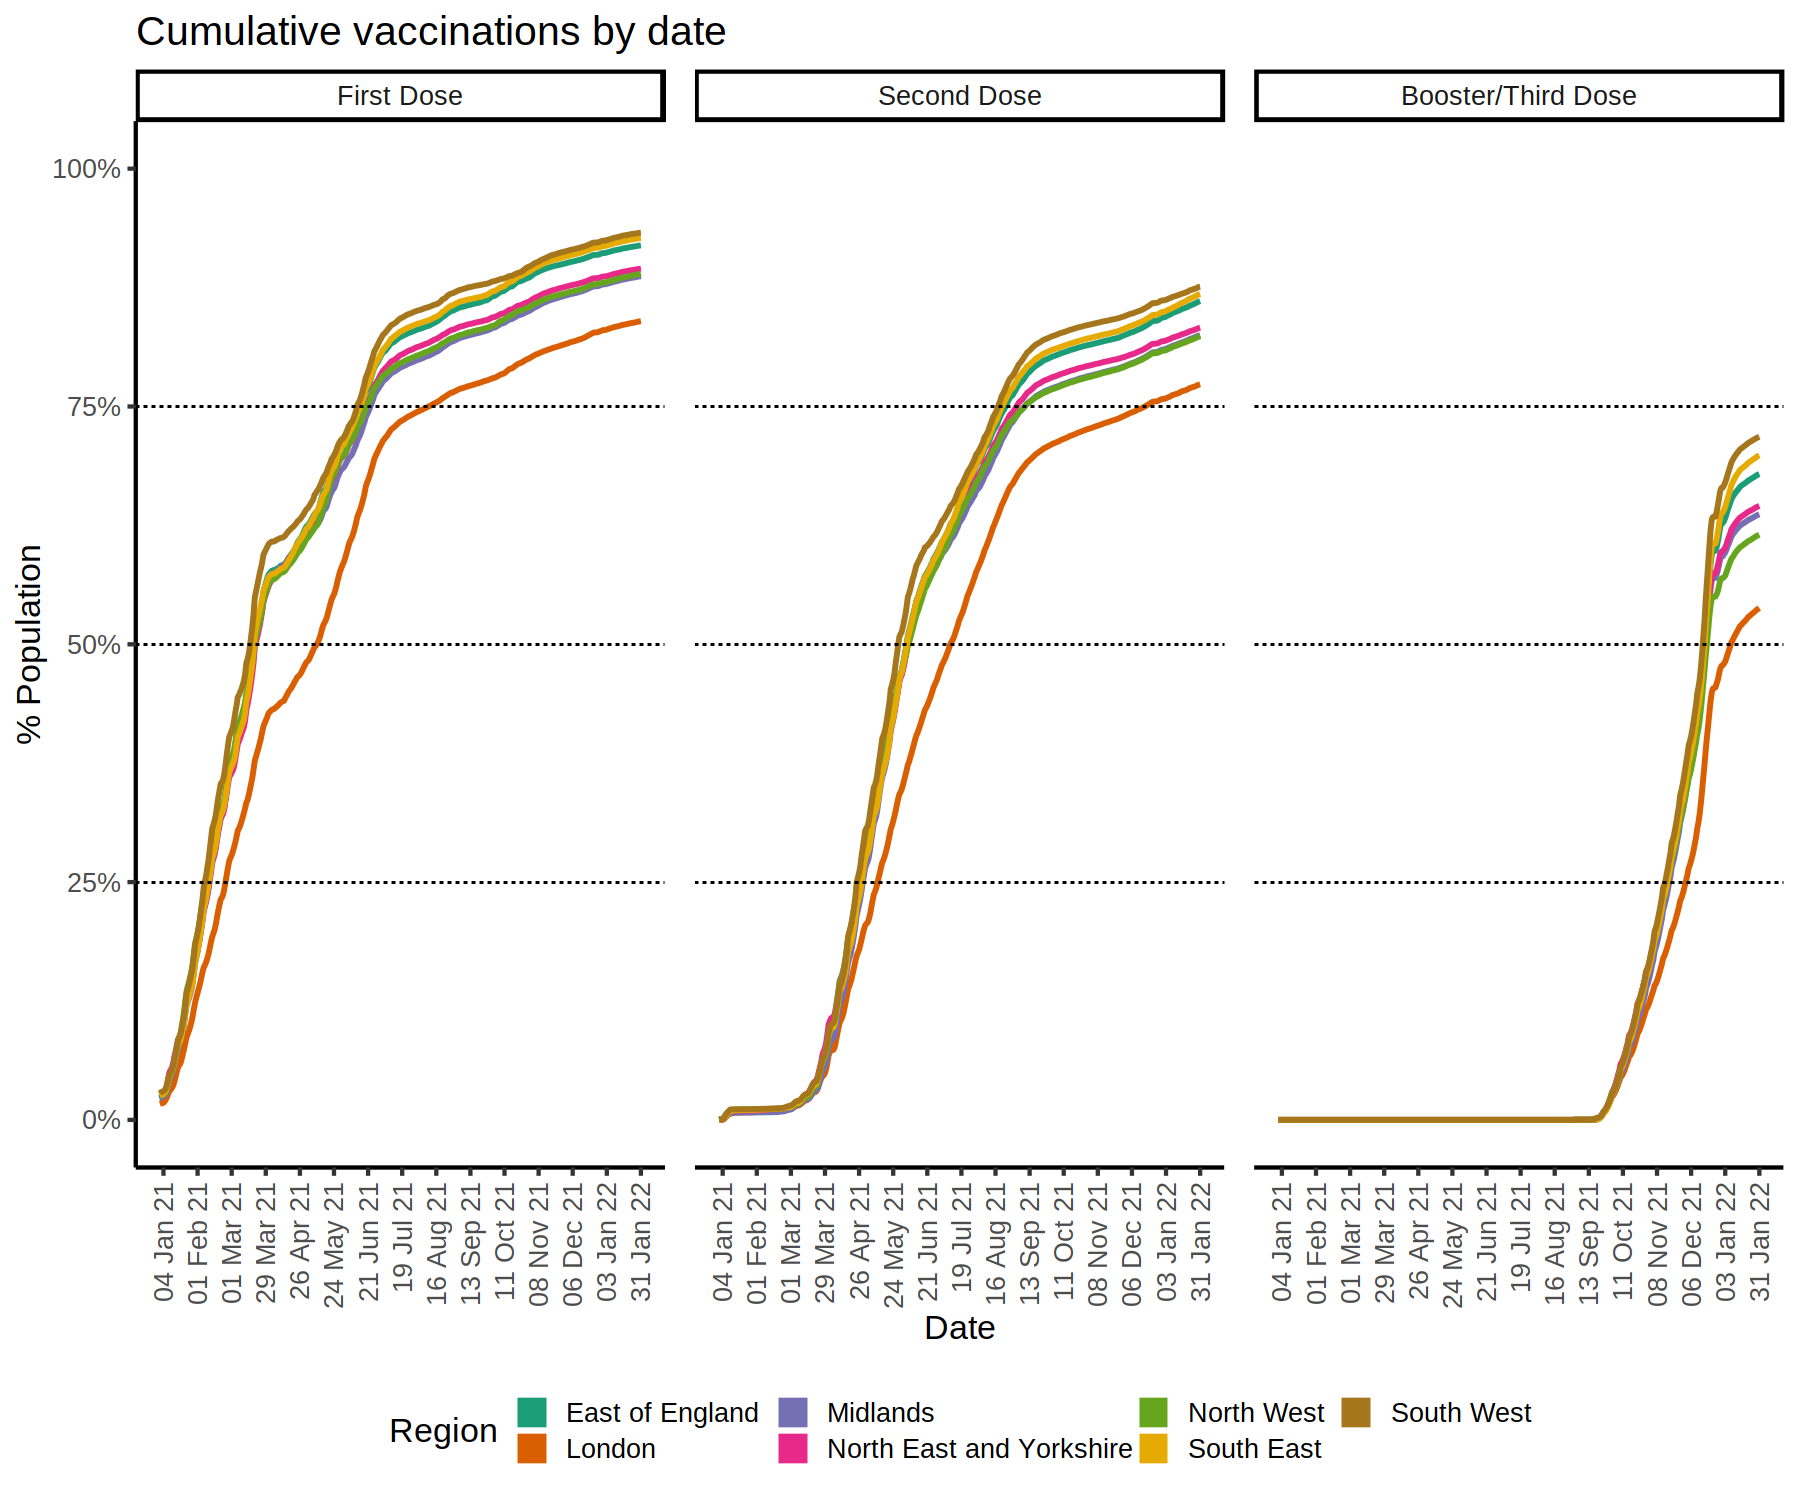

In [37]:
ggplot(dat2, aes(Date, Fraction, color = Region)) + geom_line(size = 1) + 
    facet_wrap(~ Dose, nrow = 1) + theme_classic(base_size = 16) +
    scale_x_date(date_labels = "%d %b %y", date_breaks = "4 week") +
    scale_y_continuous(limits = c(0, 1), labels = percent_format(accuracy = 1)) +
    scale_color_brewer(palette = "Dark2") + guides(color = guide_legend(override.aes = list(size = 5))) +
    geom_hline(yintercept = seq(0.25, 0.75, 0.25), linetype = 2) +
    theme(legend.position = "bottom", axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1), 
          panel.spacing = unit(1, "lines")) +
    labs(title = "Cumulative vaccinations by date", x = "Date", y = "% Population")

## 8. Session info

In [38]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS/LAPACK: /home/ihsuan/miniconda3_4.10.0/envs/r4/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_GB.UTF-8       LC_NUMERIC=C               LC_TIME=en_GB.UTF-8       
 [4] LC_COLLATE=en_GB.UTF-8     LC_MONETARY=en_GB.UTF-8    LC_MESSAGES=en_GB.UTF-8   
 [7] LC_PAPER=en_GB.UTF-8       LC_NAME=C                  LC_ADDRESS=C              
[10] LC_TELEPHONE=C             LC_MEASUREMENT=en_GB.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] forcats_0.5.1   stringr_1.4.0   dplyr_1.0.7     purrr_0.3.4     readr_2.1.2     tidyr_1.2.0    
 [7] tibble_3.1.6    tidyverse_1.3.1 scales_1.1.1    ggplot2_3.3.5   readxl_1.3.1   

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.8         lubridate_1.8.0    gtools_3.9.2       assertthat_0.2.1   